# Cluster Analysis
Source: https://realpython.com/k-means-clustering-python/

In [162]:
from PedigreeVisualization import *


import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import scale



In [214]:
# Make sure Jupyter Notebook shows all outputs from the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.rcParams['figure.dpi'] = 600

## Get inpt files

In [197]:
P = pd.read_csv('.\Input\Pedigree599.csv')
P = P.loc[:,['GID','Pedigree','Selection History','Specific Name']]
# P = P.set_index(P['GID'])
# Fill None with nan
P = P.fillna(value=np.nan)

# P

**Fixed Inconsistencies**


```P.iloc[46, 1]``` \
```P.iloc[137, 1]``` \
Replaced 4777 by G4777


```P.iloc[413, 1]``` \
```'WEAVER/WL3926//'``` \
removed //


```P.iloc[514, 1]```  
```'KEA/TANAGER/4/THRUSH/3/KALYANSONA/BLUEBIRD//TOQUIFEN I1/5/PAVON/6/'``` \
removed /6/

HD 2160/5/TOBARI F 66/CIANO F 67//BLUEBIRD/3/NAINARI 60*2//TOM THUMB/SONORA 64/4/HD 1954


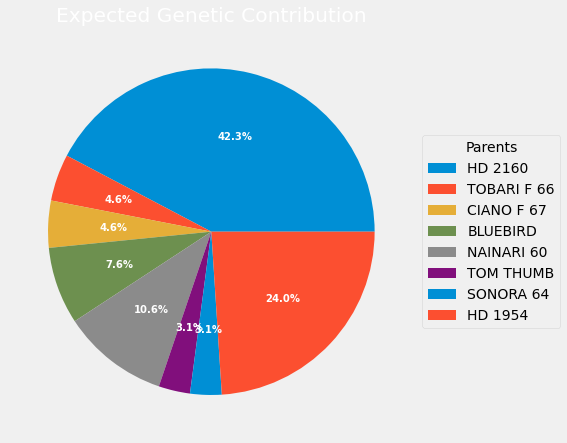

In [205]:
pedigree = P.iloc[35, 1]
# pedigree = 'A/B//TH/3/*5G'
DD = AnCon(pedigree, R=1, SimplifyPed=False)
PedigreeVis(DD, Log=True)

In [219]:
%%time
df_AC = df_AnCon(df=P)
df_AC = df_AC.drop('nan', axis=1)

CPU times: total: 1.53 s
Wall time: 1.52 s


In [131]:
df1 = df_AC.copy()
df1['SUM'] = df1.sum(axis=1)
df1.loc[df1['SUM'] != 1]

2F2  2F5  2V879.C8.11  84.40023  AE.SQUARROSA (205)  \
107066   0.0  0.0          0.0       0.0                 0.0   
342374   0.0  0.0          0.0       0.0                 0.0   
343376   0.0  0.0          0.0       0.0                 0.0   
355411   0.0  0.0          0.0       0.0                 0.0   
770505   0.0  0.0          0.0       0.0                 0.0   
1127595  0.0  0.0          0.0       0.0                 0.0   
2668072  0.0  0.0          0.0       0.0                 0.0   

         AE.SQUARROSA (214)  AE.SQUARROSA (224)  AEGILOPS SQUARROSA (TAUS)  \
107066                  0.0                 0.0                        0.0   
342374                  0.0                 0.0                        0.0   
343376                  0.0                 0.0                        0.0   
355411                  0.0                 0.0                        0.0   
770505                  0.0                 0.0                        0.0   
1127595                 0.0                 0.0                        0.0   
2668072                 0.0                 0.0                        0.0   

         AGATHA  ALDAN  ...  YAQUI 48  YAQUI 50  YAQUI 50-ENANO  YAQUI 53  \
107066      0.0    0.0  ...       0.0       0.0             0.0       0.0   
342374      0.0    0.0  ...       0.0       0.0             0.0       0.0   
343376      0.0    0.0  ...       0.0       0.0             0.0       0.0   
355411      0.0    0.0  ...       0.0       0.0             0.0       0.0   
770505      0.0    0.0  ...       0.0       0.0             0.0       0.0   
1127595     0.0    0.0  ...       0.0       0.0             0.0       0.0   
2668072     0.0    0.0  ...       0.0       0.0             0.0       0.0   

         YAVAROS 79  YDING  YECORA F 70  ZARAGOZA 75  ZOPILOTE  SUM  
107066          0.0    0.0          0.0          0.0       0.0  0.0  
342374          0.0    0.0          0.0          0.0       0.0  0.0  
343376          0.0    0.0          0.0          0.0       0.0  0.0  
355411          0.0    0.0          0.0          0.0       0.0  0.0  
770505          0.0    0.0          0.0          0.0       0.0  0.0  
1127595         0.0    0.0          0.0          0.0       0.0  0.0  
2668072         0.0    0.0          0.0          0.0       0.0  0.0  

[7 rows x 409 columns]

In [ ]:
# plt.rcParams['figure.dpi'] = 600

In [ ]:
%%time
PlotRelationship(df_AC, Cov=False, PlotSize=(12,12), LW=0., LabSize=1)

In [ ]:
%%time
PlotRelationship(df_AC.T, Cov=True, PlotSize=(16,16), LW=0, LabSize=1)

## Sparse PCA

In [255]:
X = df_AC.T.cov()

pca = PCA()
# sp_pca = SparsePCA()
transformer = PCA(n_components=20, random_state=0)
# transformer = SparsePCA(n_components=2, random_state=0)
transformer.fit(X)

PCA(n_components=20, random_state=0)

In [256]:
# X_transformed = transformer.transform(scale(X))
X_transformed = transformer.transform(X)
X_transformed.shape
np.mean(transformer.components_ == 0)

(599, 20)

0.011686143572621035

In [260]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [262]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=0
)

In [265]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=0)

<AxesSubplot:>

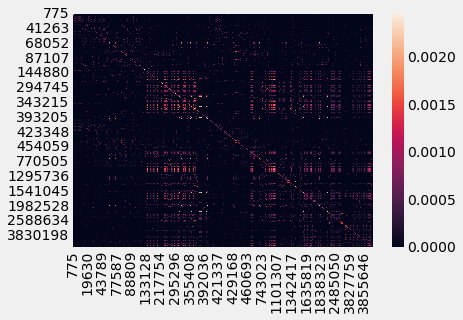

In [169]:
sns.heatmap(X)

<AxesSubplot:>

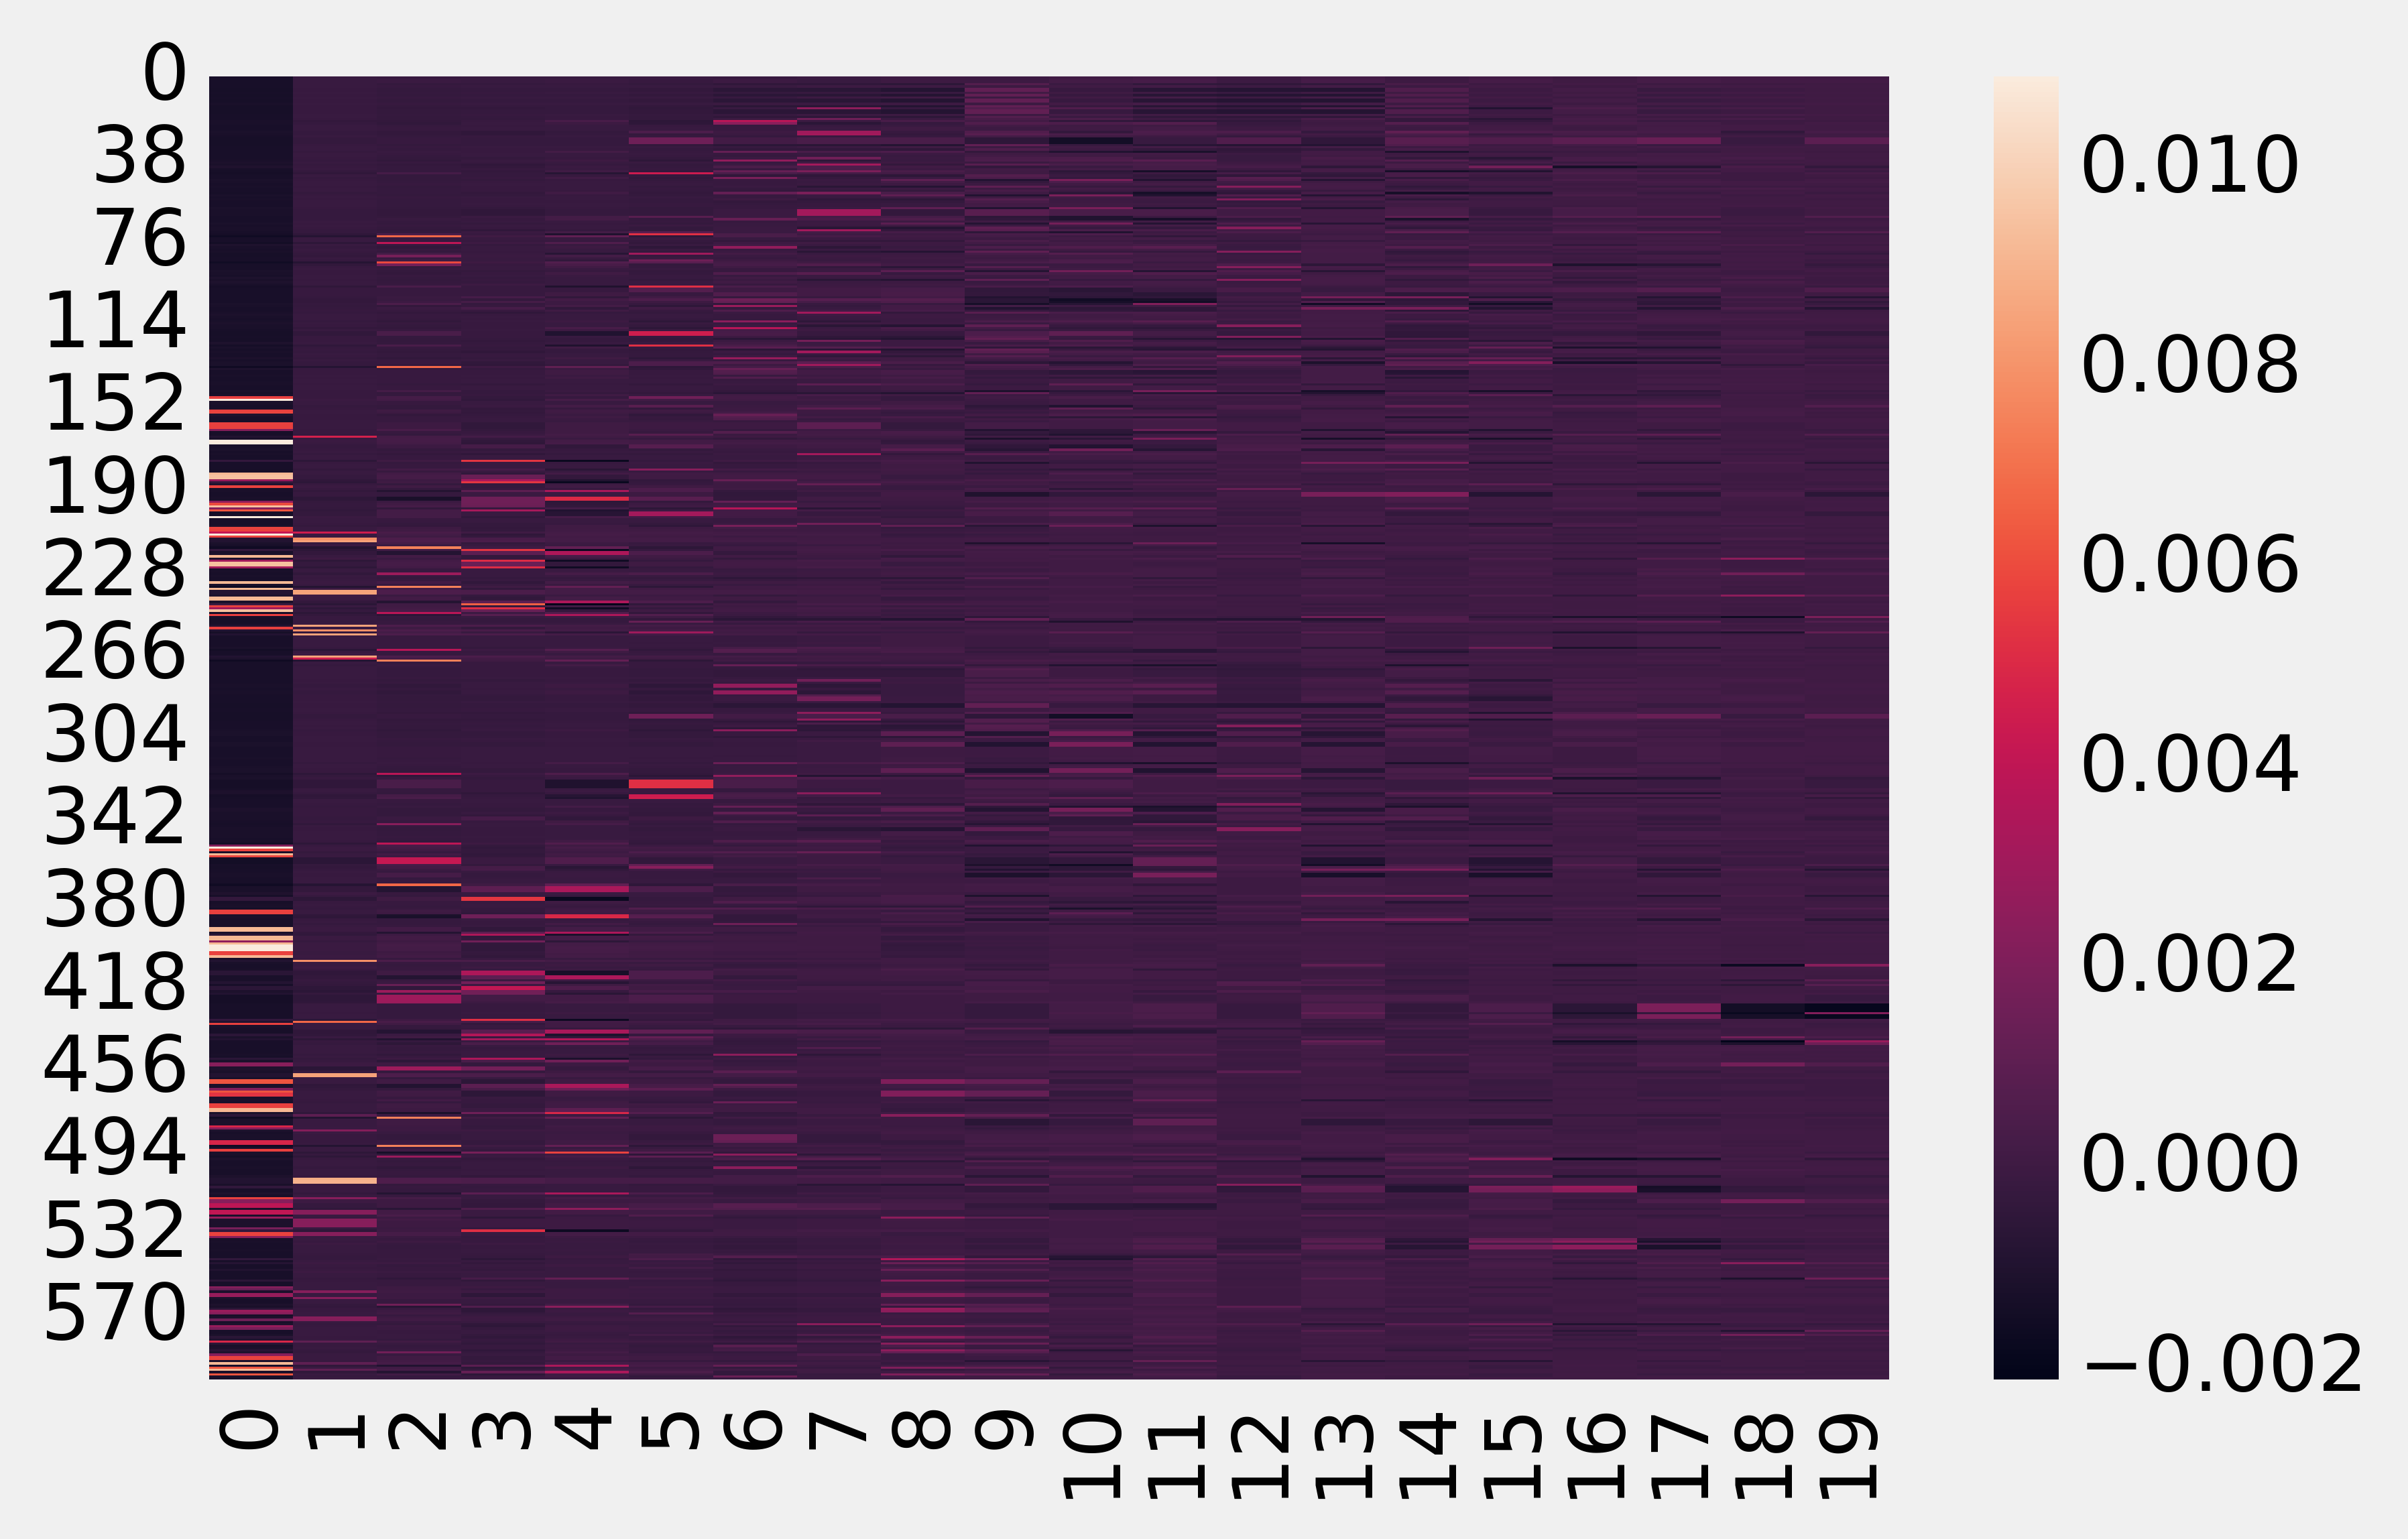

In [240]:
sns.heatmap(X_transformed)

In [ ]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Variance Explained')

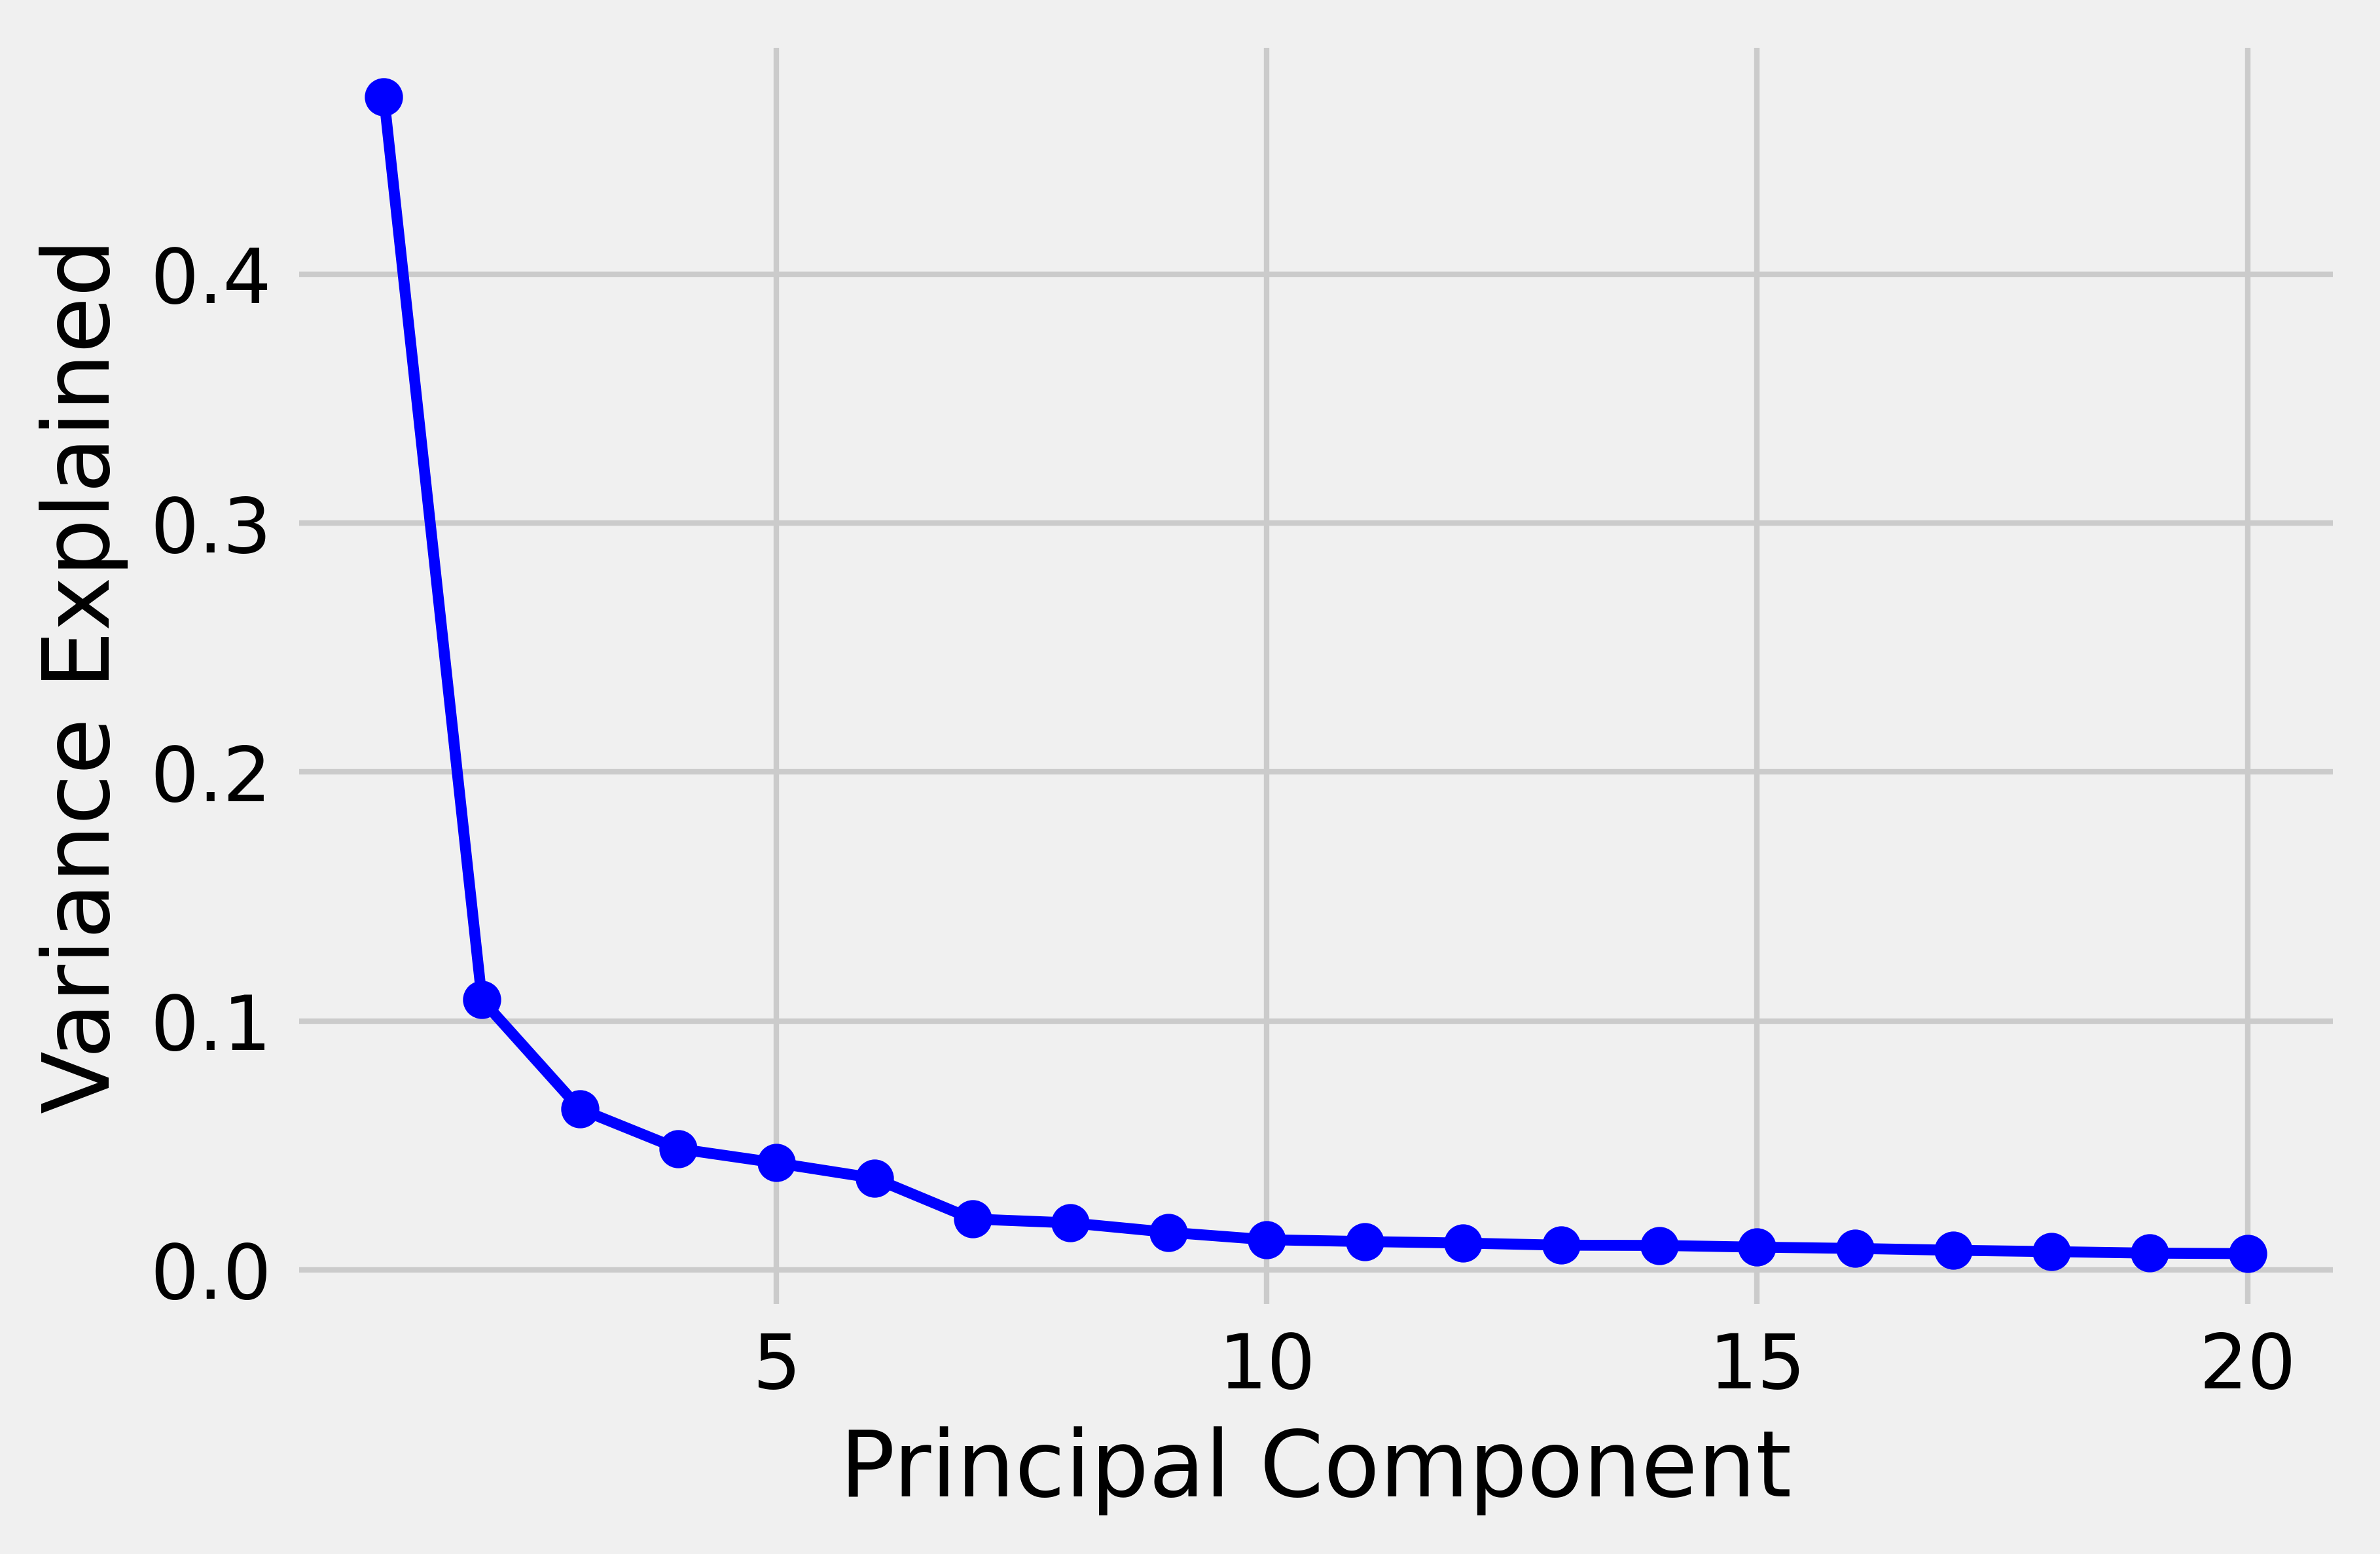

In [241]:
PC_values = np.arange(transformer.n_components_) + 1
plt.plot(PC_values, transformer.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
# plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## G matrix

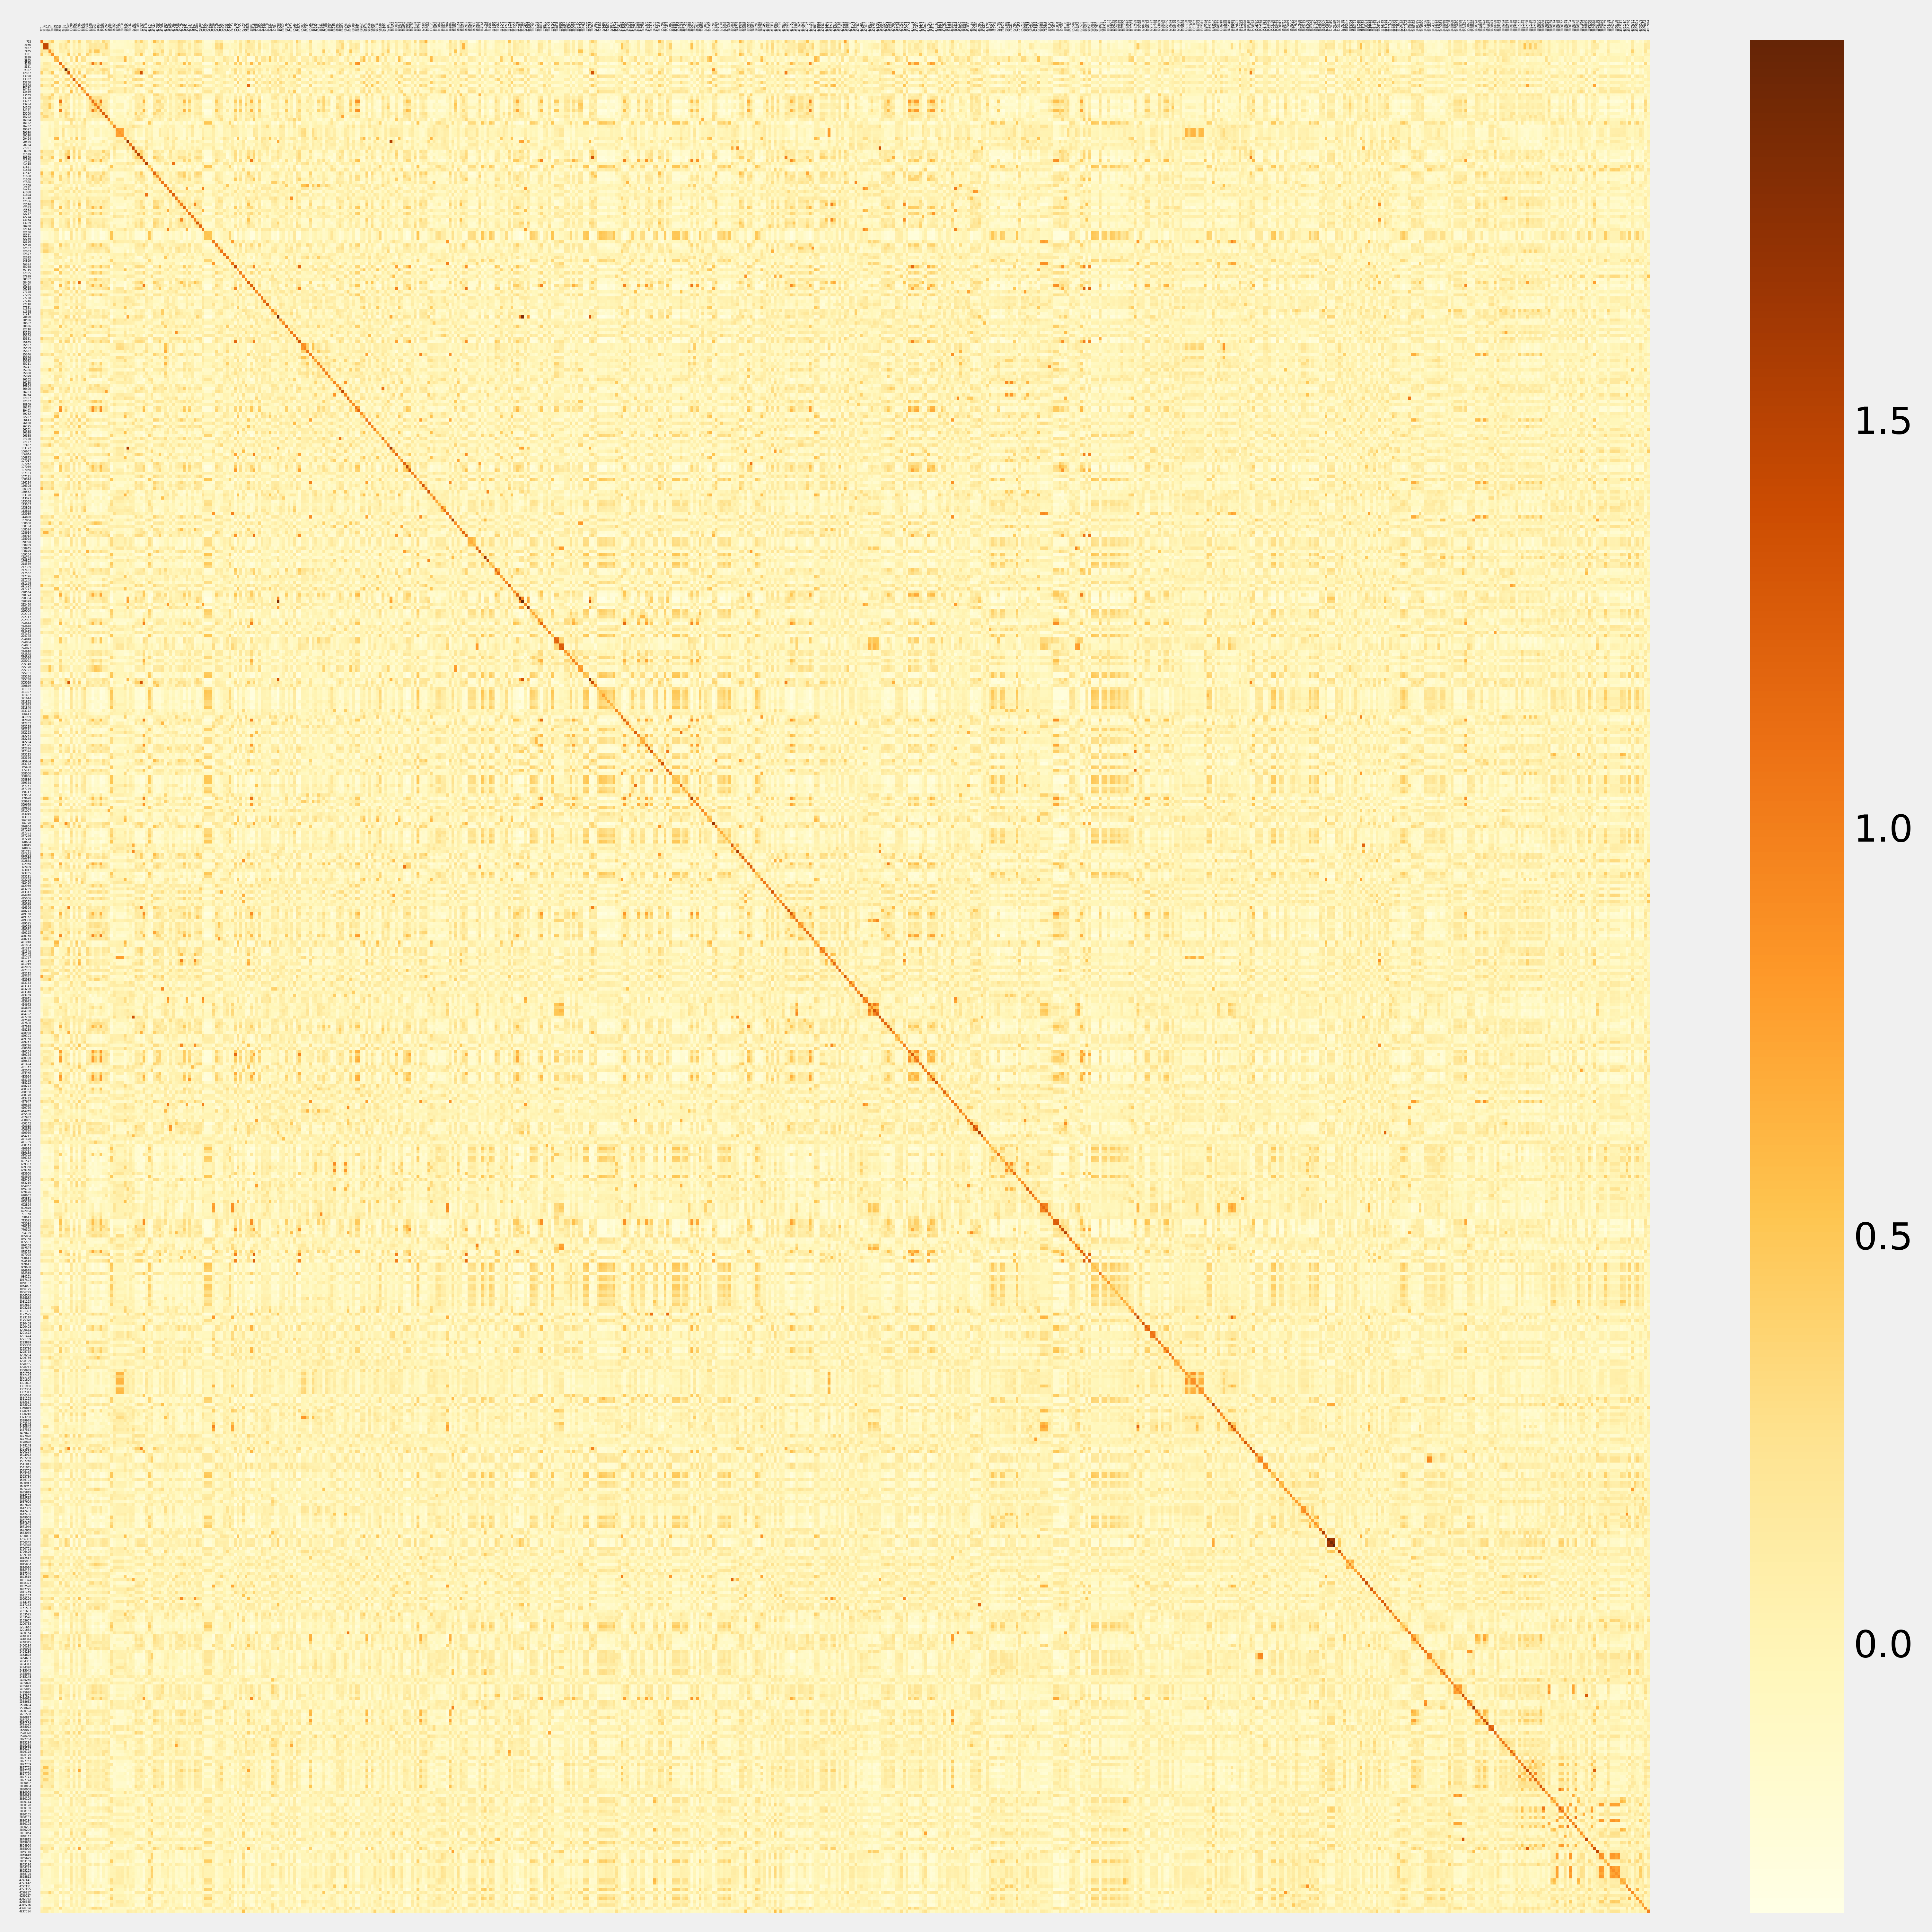

In [226]:
G = pd.read_csv('Input/G_wheat599.csv')
G = G.drop('ID', axis=1)
G = G.set_index(G.columns)
# G

PlotRelationship(G, Cov=False, PlotSize=(12,12), LW=0., LabSize=1)

PCA(n_components=20, random_state=0)

(599, 20)

0.0

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Variance Explained')

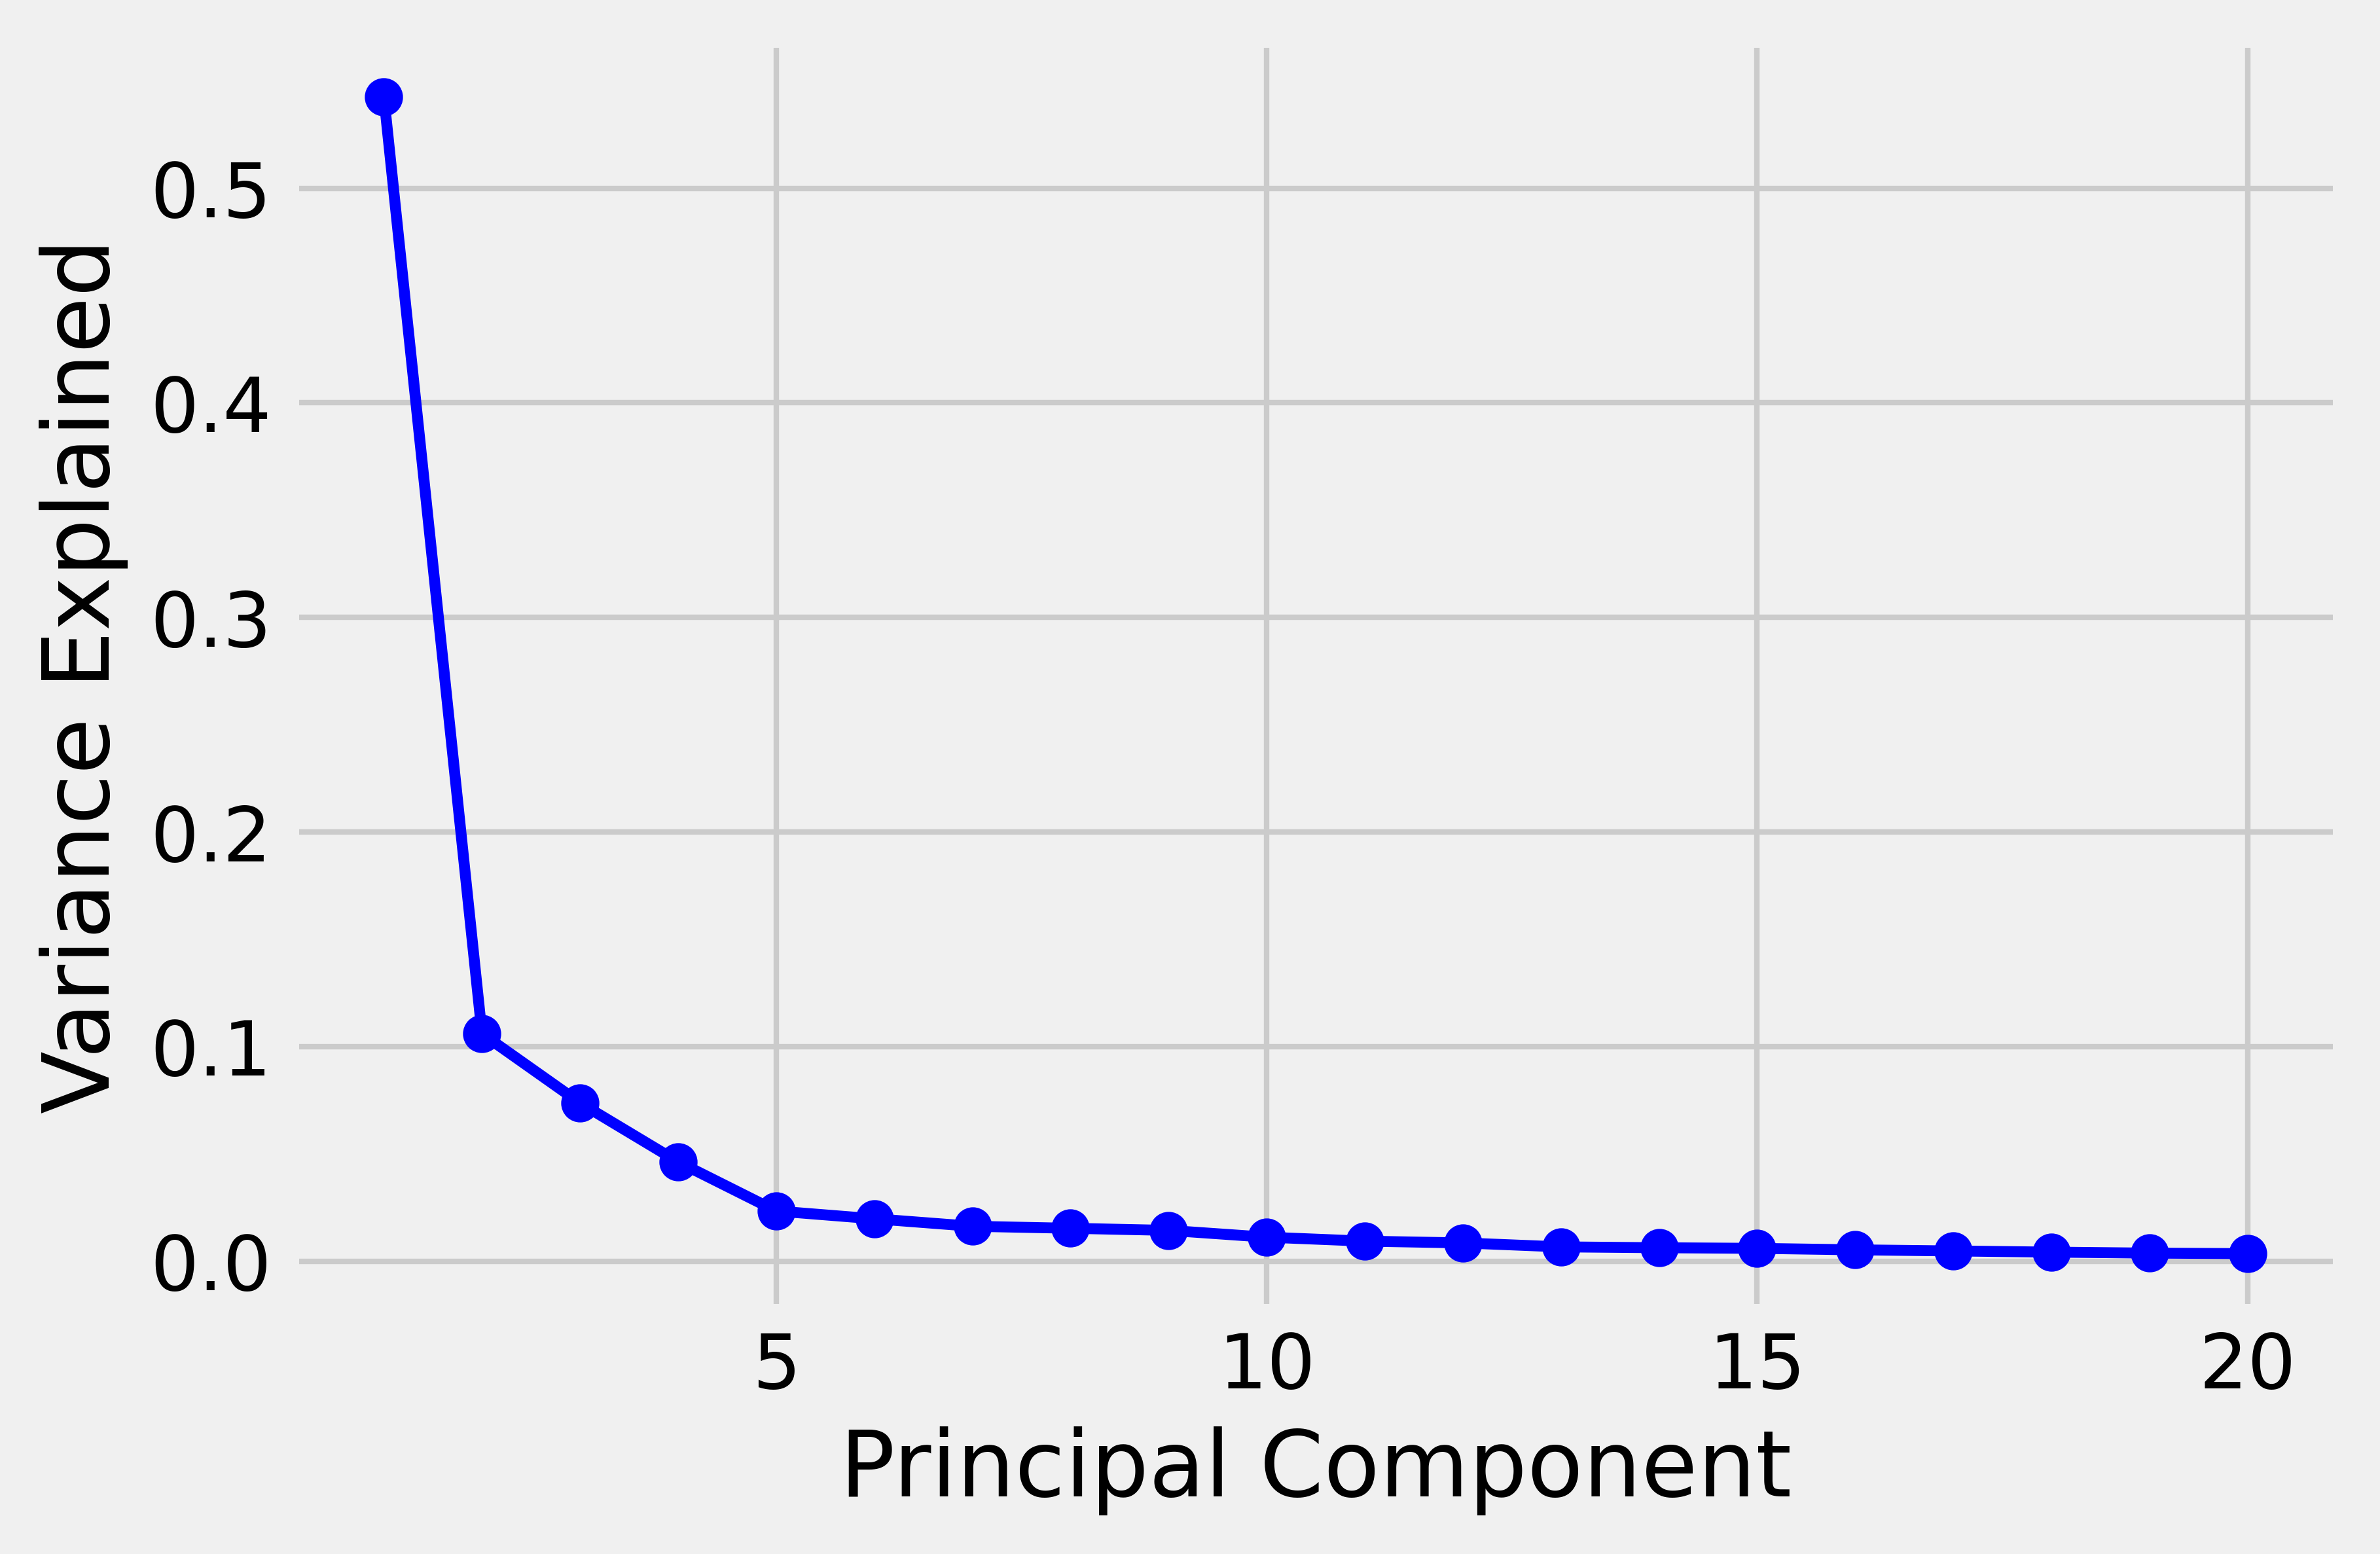

In [244]:
X_G = G 
transformer = PCA(n_components=20, random_state=0)
transformer.fit(X_G)
XG_transformed = transformer.transform(X_G)
XG_transformed.shape
np.mean(transformer.components_ == 0)

PC_values = np.arange(transformer.n_components_) + 1
plt.plot(PC_values, transformer.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
# plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

<AxesSubplot:>

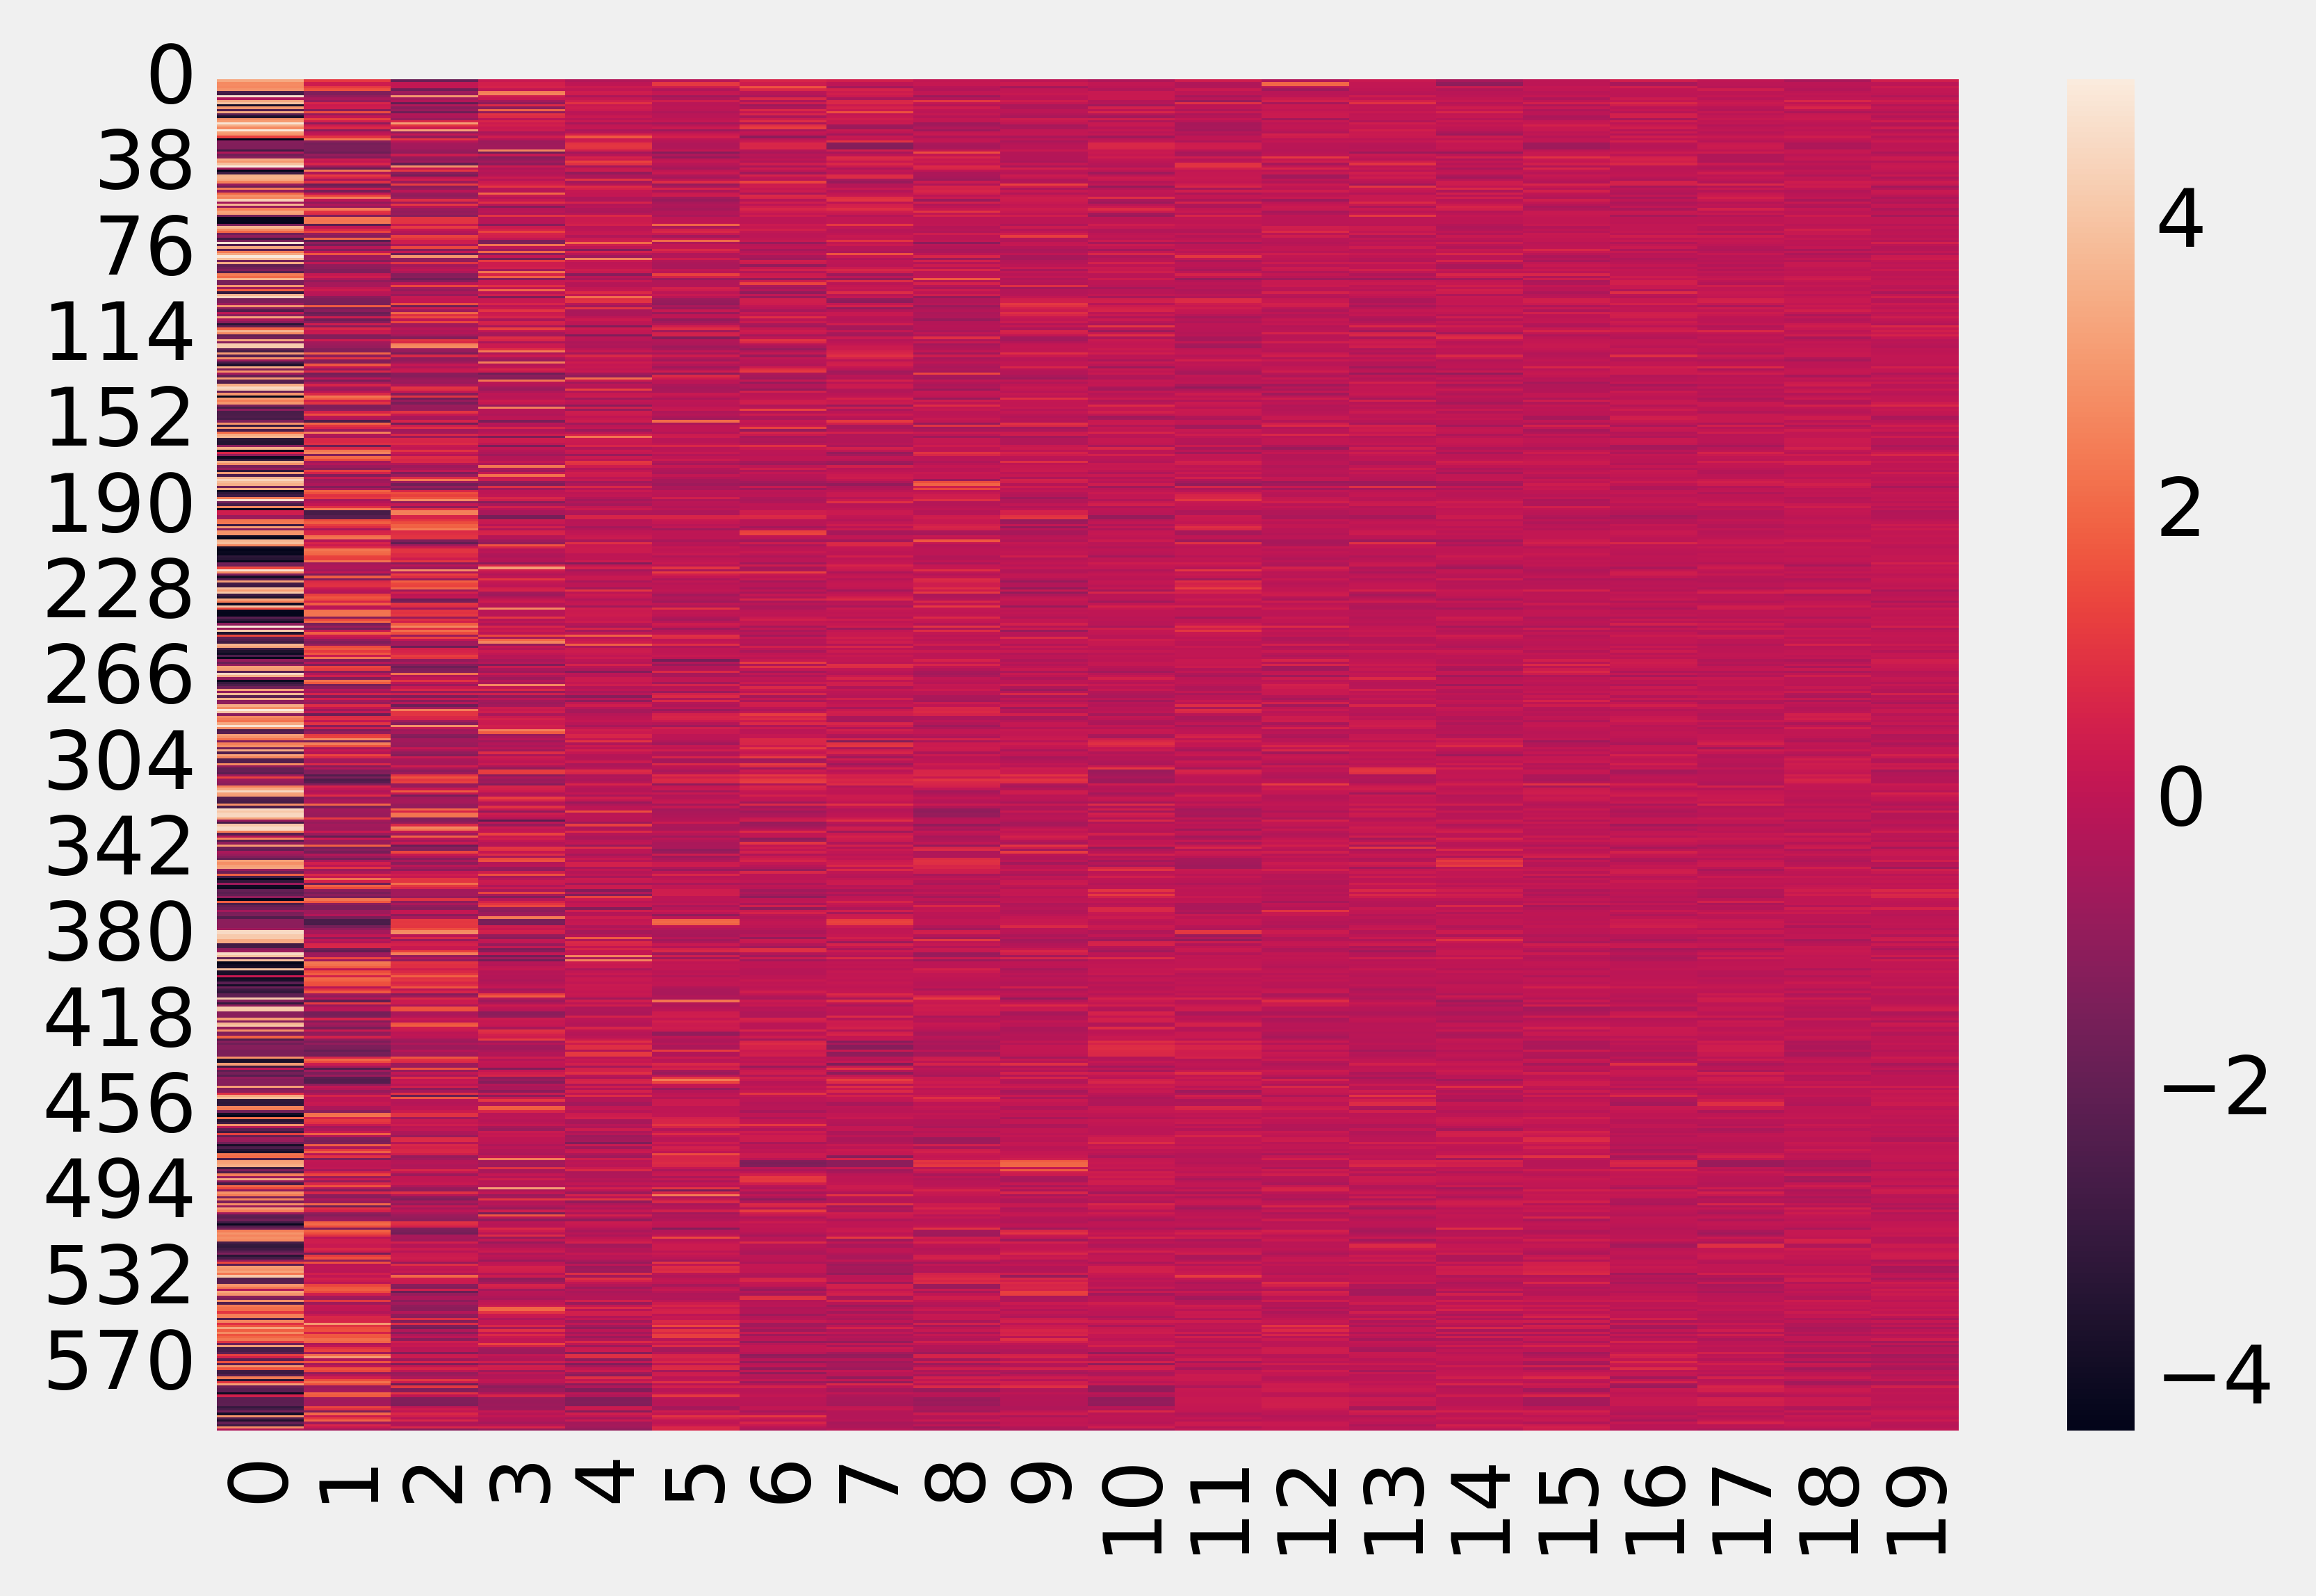

In [245]:
sns.heatmap(XG_transformed)

## A Matrix

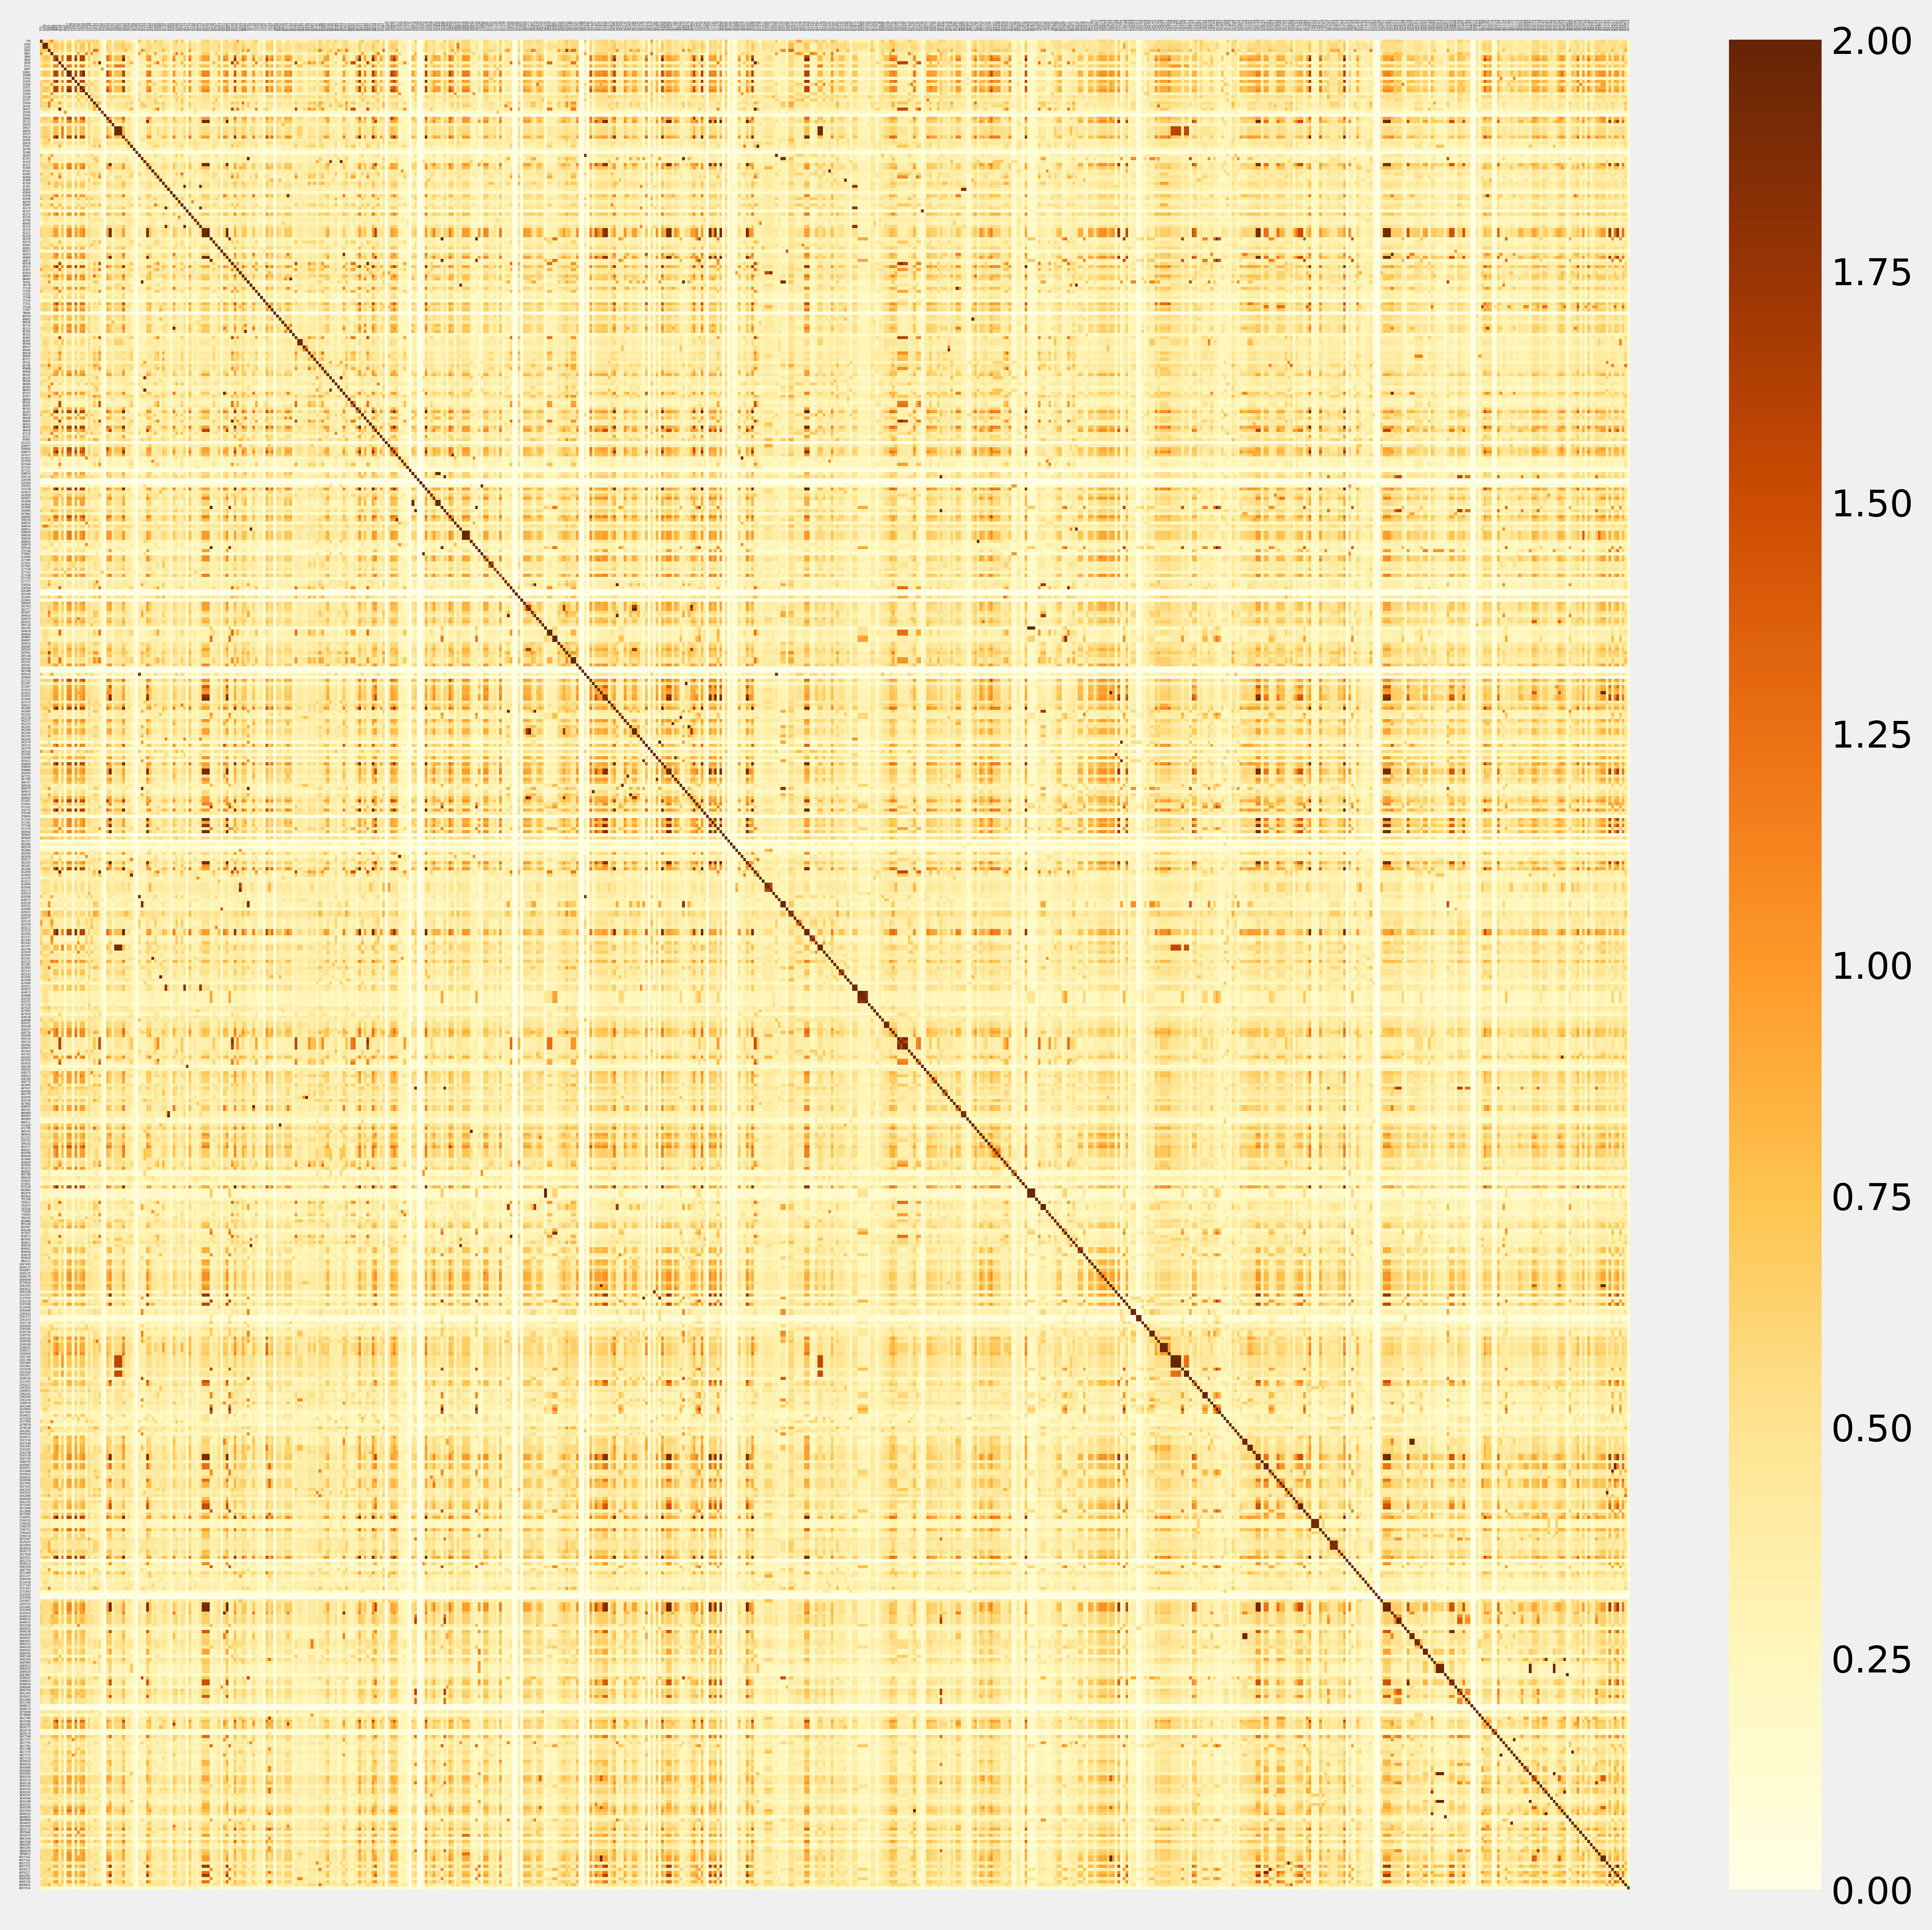

In [227]:
A = pd.read_csv('Input/A.csv')
A = A.drop('Unnamed: 0', axis=1)
A = A.set_index(A.columns)
# A

PlotRelationship(A, Cov=False, PlotSize=(12,12), LW=0., LabSize=1)

PCA(n_components=20, random_state=0)

(599, 20)

0.0

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Variance Explained')

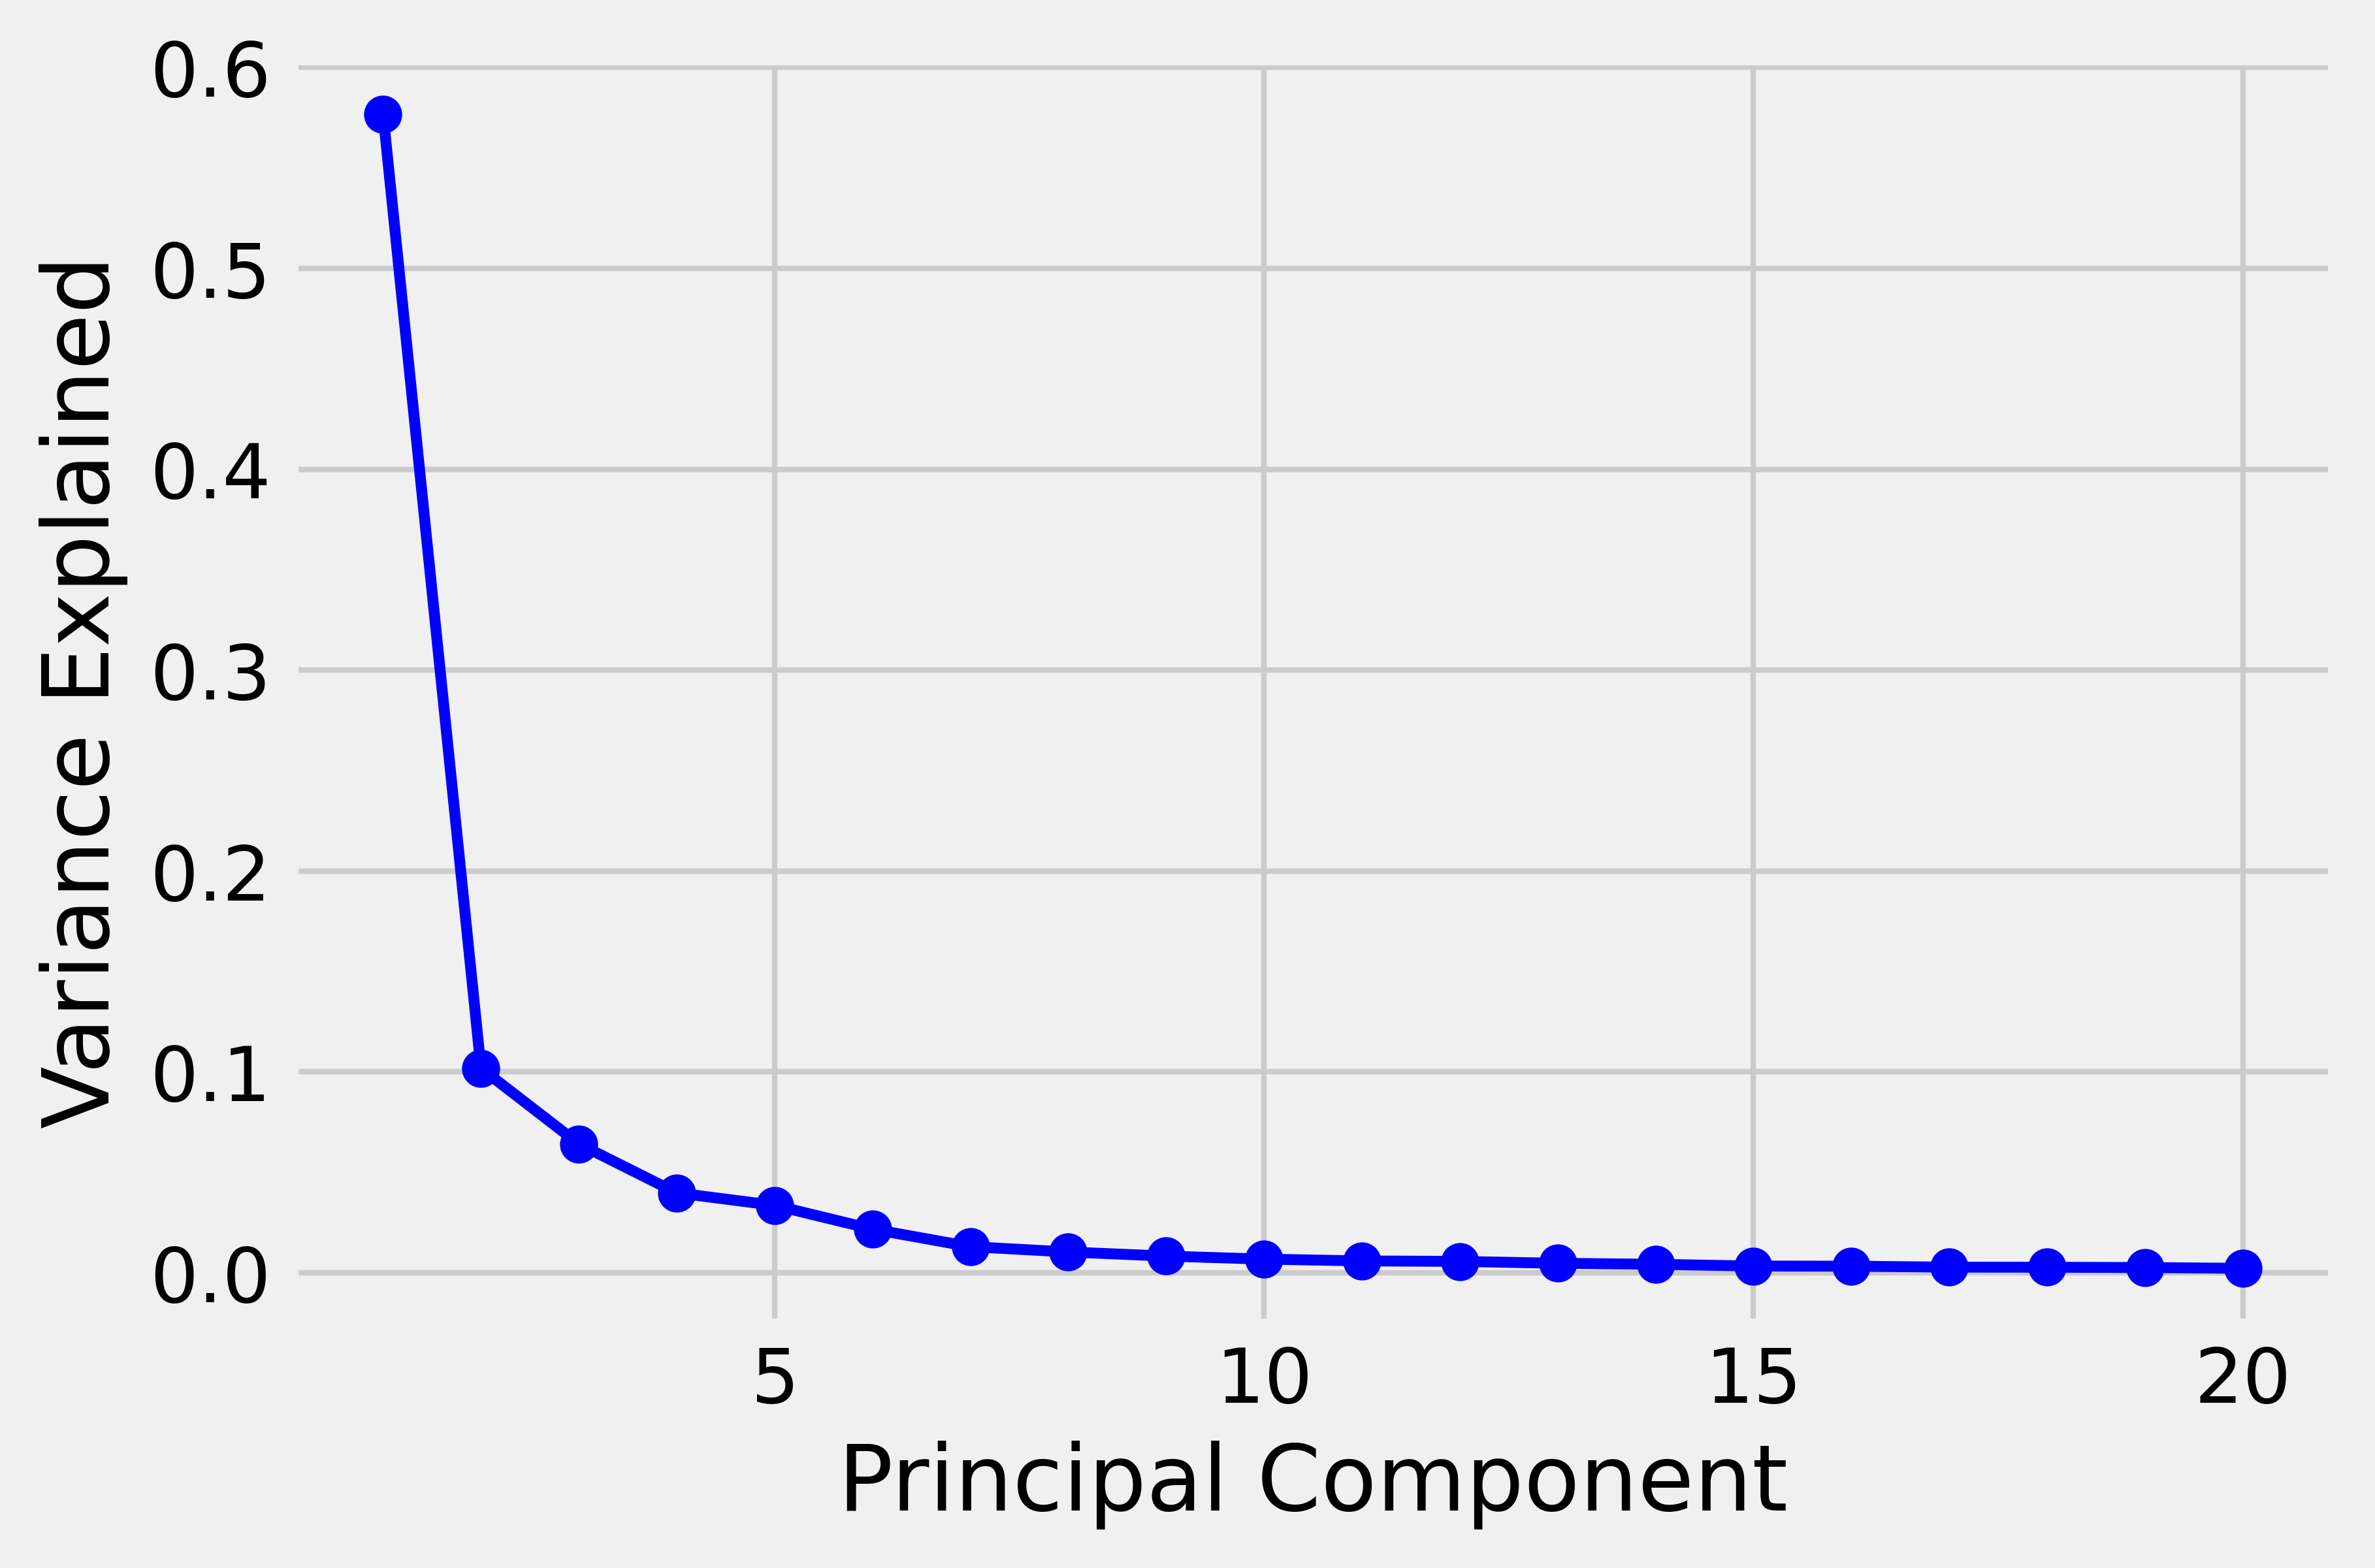

In [246]:
X_A = A
transformer = PCA(n_components=20, random_state=0)
transformer.fit(X_A)
XA_transformed = transformer.transform(X_A)
XA_transformed.shape
np.mean(transformer.components_ == 0)

PC_values = np.arange(transformer.n_components_) + 1
plt.plot(PC_values, transformer.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
# plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

<AxesSubplot:>

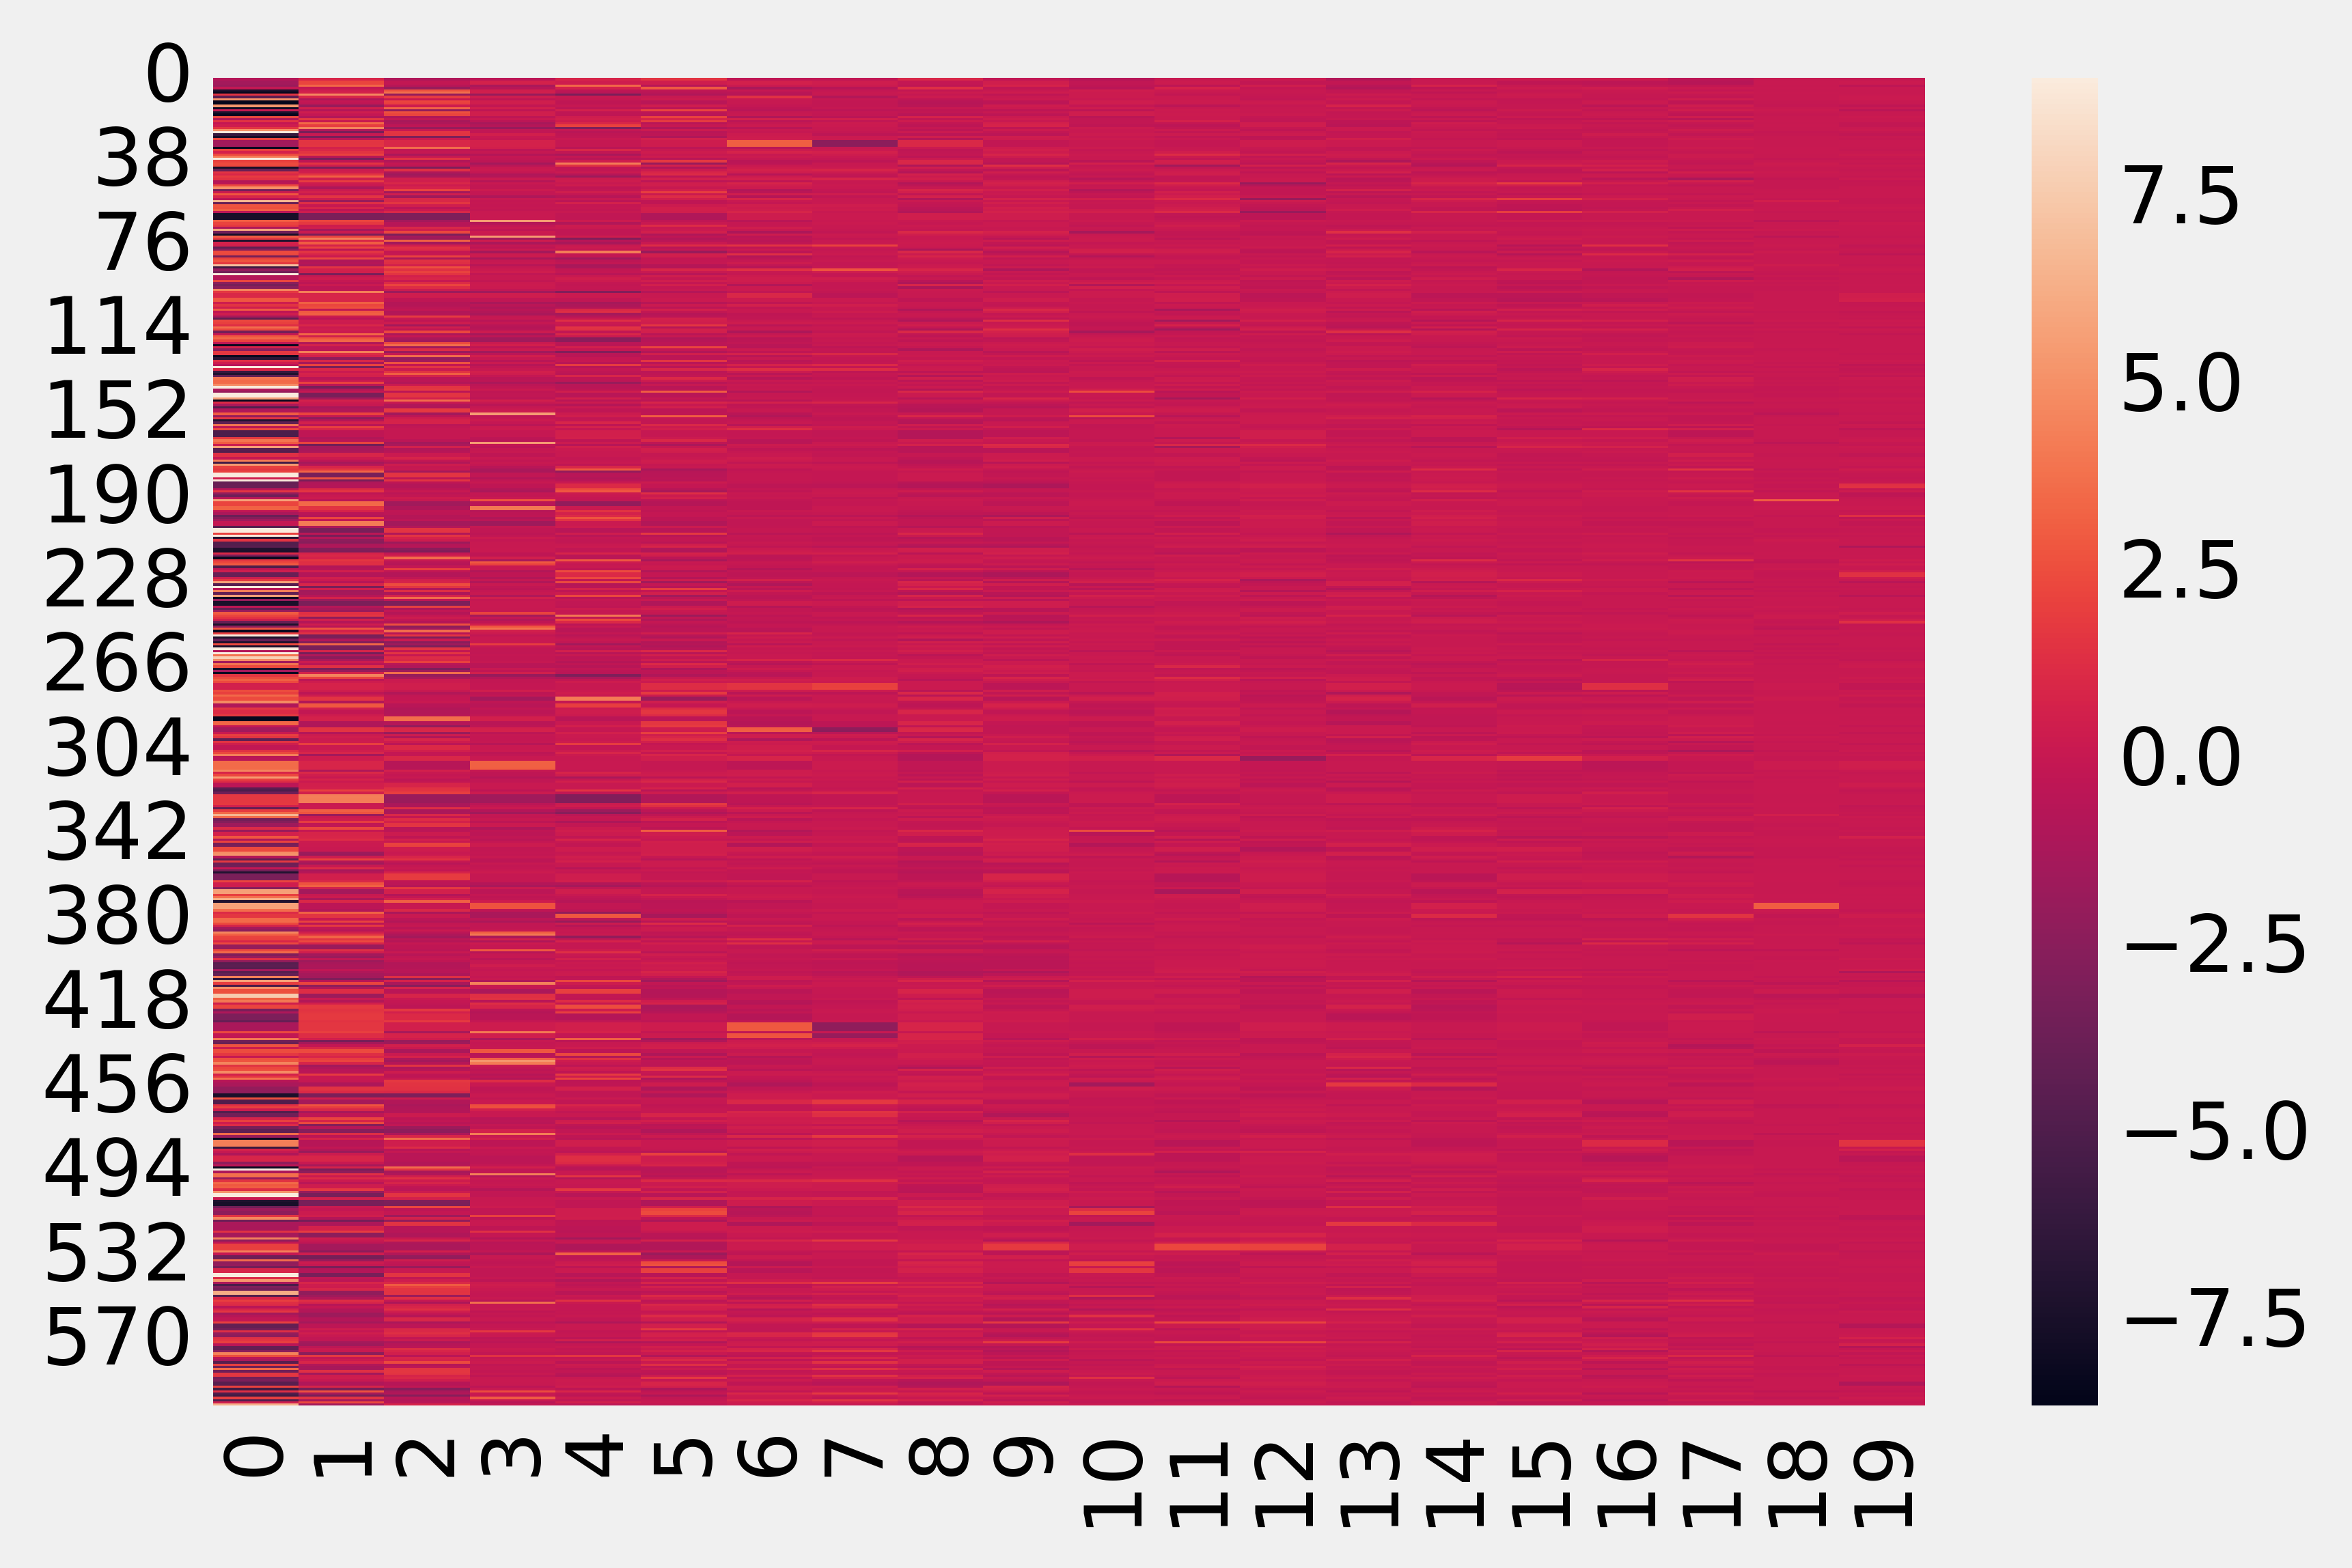

In [247]:
sns.heatmap(XA_transformed)

<AxesSubplot:>

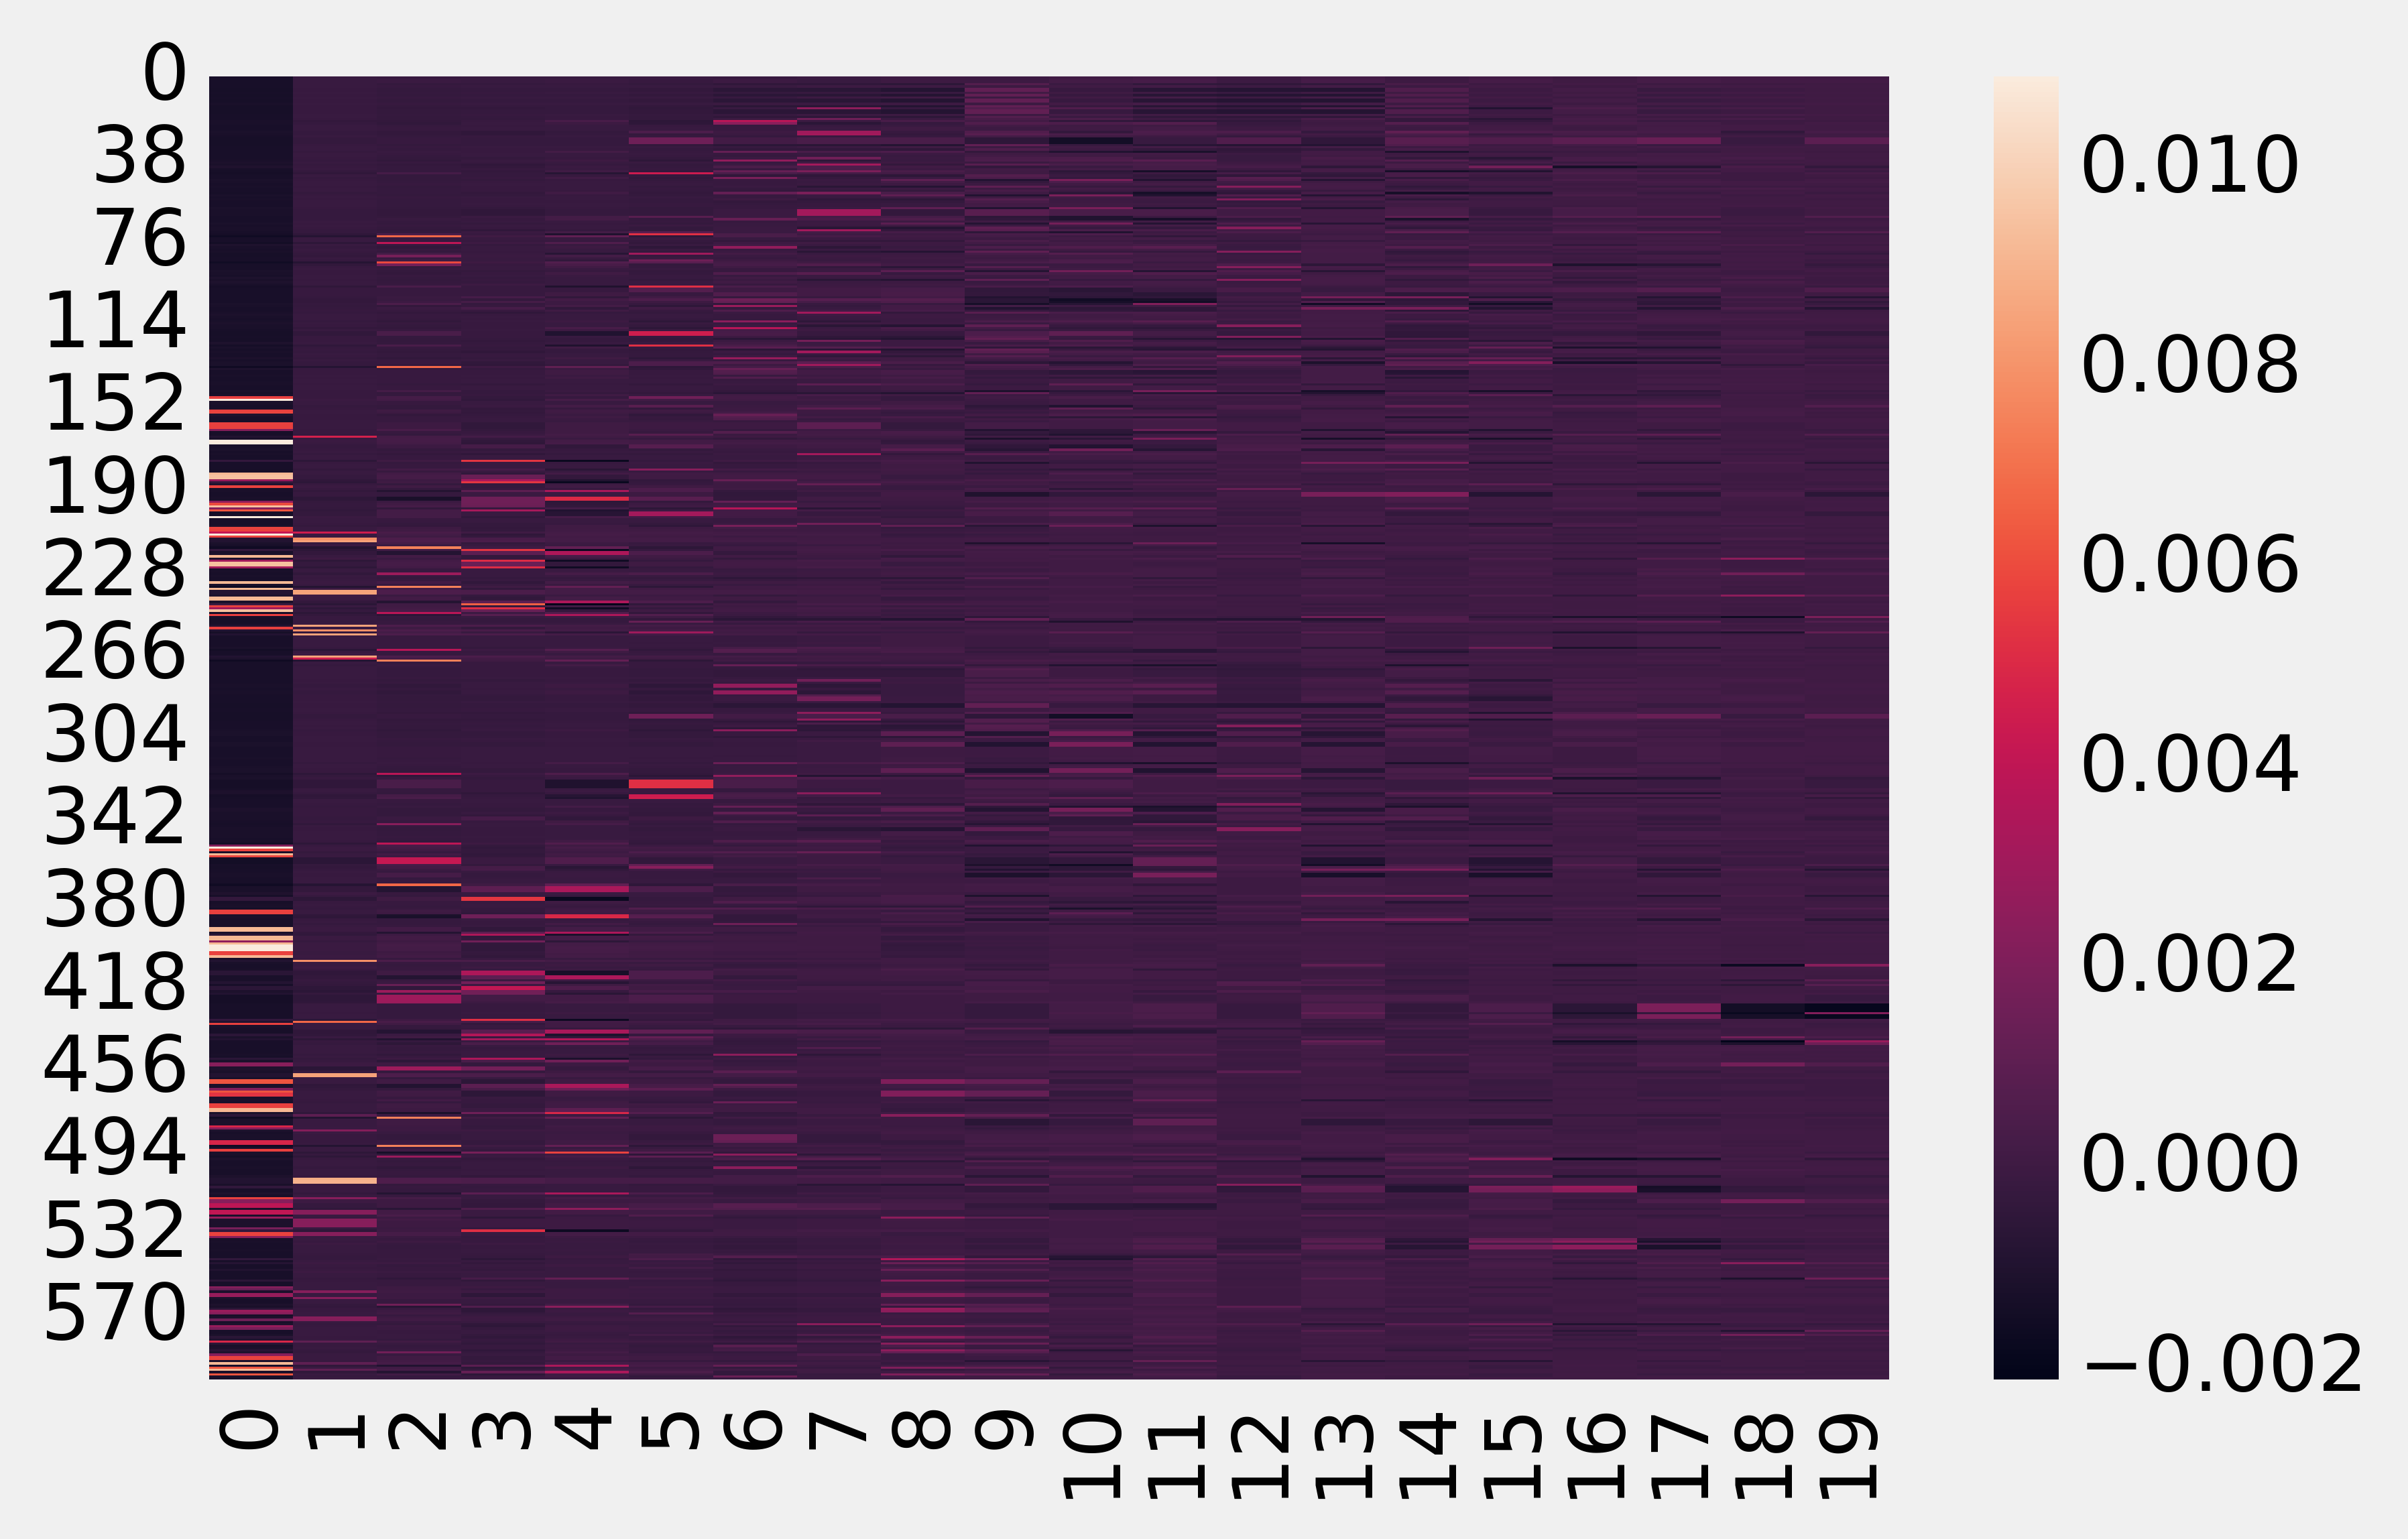

In [252]:
sns.heatmap(X_transformed)

In [ ]:
%%time

# Presentation
plt.rcParams['figure.dpi'] = 100

# Retention
Sub = PC15_SpikesFieldLog.iloc[:,np.r_[0:3,7,12,15,20,21]]
sns_plot = sns.pairplot(Sub, hue="Inhibition", kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
sns_plot.savefig(".\RESULTS\Spikes\Spikes_Reten_Inhib.png")
sns_plot = sns.pairplot(Sub, hue="Site", kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
sns_plot.savefig(".\RESULTS\Spikes\Spikes_Reten_Site.png")

# Yield loss
Sub = PC15_SpikesFieldLog.iloc[:,np.r_[0:4,6,7,18,20,21]]
sns_plot = sns.pairplot(Sub, hue="Inhibition", kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
sns_plot.savefig(".\RESULTS\Spikes\Spikes_YldLoss_Inhib.png")
sns_plot = sns.pairplot(Sub, hue="Site", kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
sns_plot.savefig(".\RESULTS\Spikes\Spikes_YldLoss_Site.png")

# SMC
Sub = PC15_SpikesFieldLog.iloc[:,np.r_[0:2,6:8,19,20,21]]
sns_plot = sns.pairplot(Sub, hue="Inhibition", kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
sns_plot.savefig(".\RESULTS\Spikes\Spikes_SMC_Inhib.png")
sns_plot = sns.pairplot(Sub, hue="Site", kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
sns_plot.savefig(".\RESULTS\Spikes\Spikes_SMC_Site.png")

### Correlation Plots

In [40]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
PC10_SpikesFieldLog = pd.concat([principalDf, df4[['AVG_Retent_SPK', 'PCTG_YldLoss', 'SMC_Unthr']]], axis = 1)


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'AVG_Retent_SPK'),
  Text(0, 1.5, 'PCTG_YldLoss'),
  Text(0, 2.5, 'SMC_Unthr')])

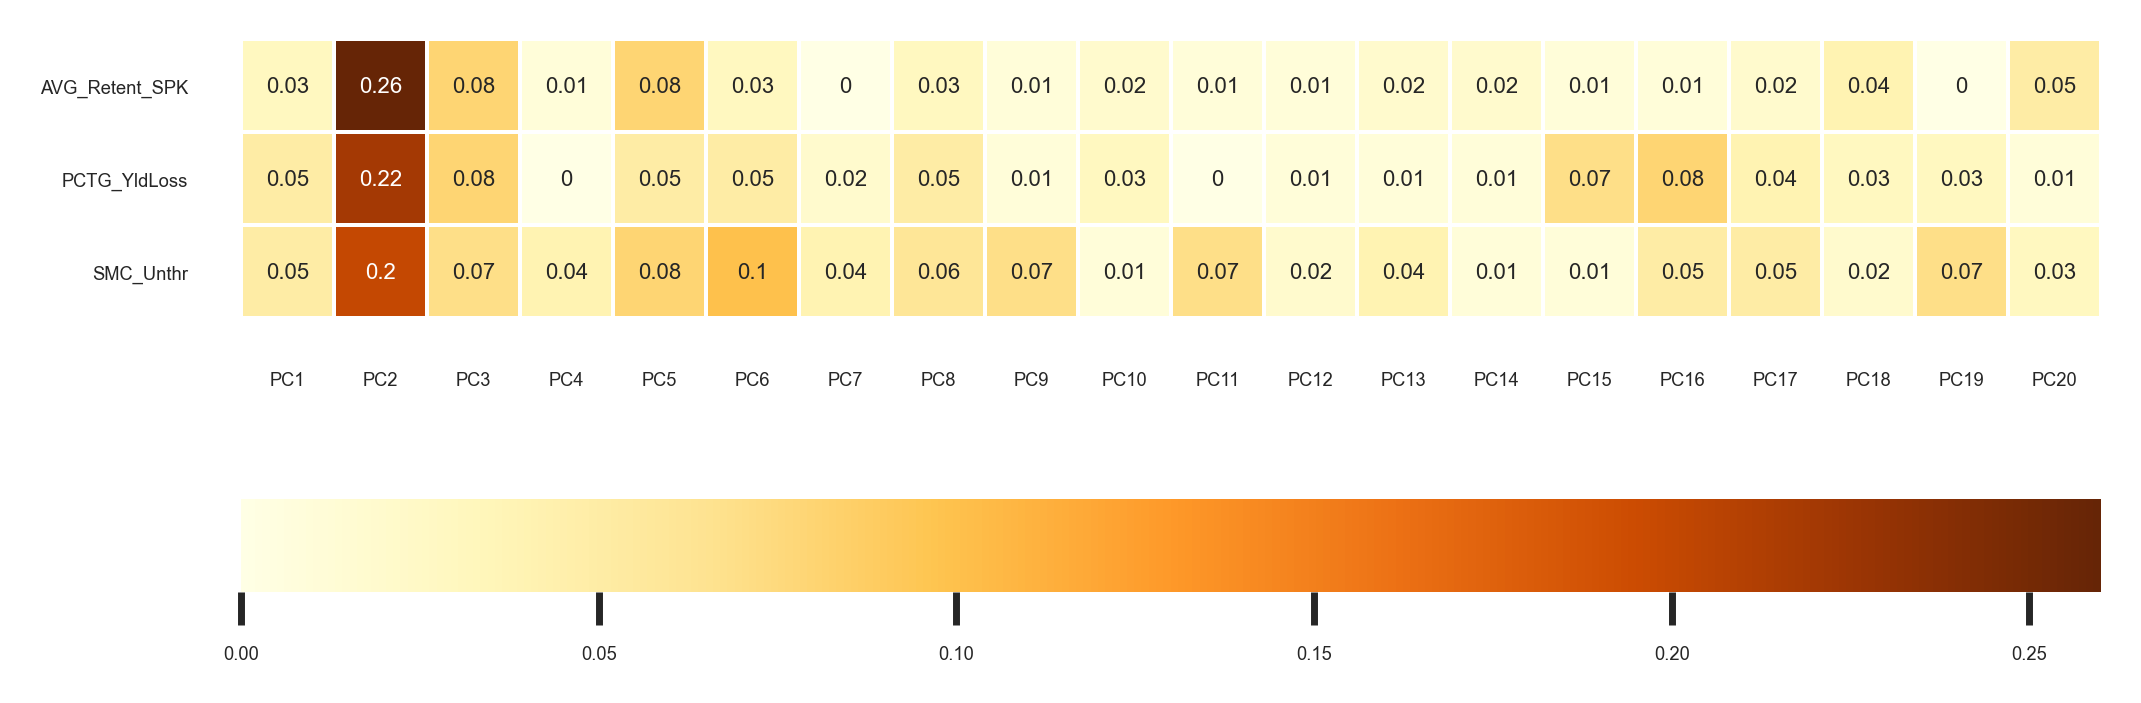

In [68]:
df = pd.DataFrame(PC10_SpikesFieldLog)

c = df.corr().abs()
c2 = c.iloc[20:23,:20]

plt.rcParams['figure.dpi'] = 400

xLabels = list(c2.columns) 
xLabels = [ "PC" + str(int(s)+1) for s in xLabels]

sns.set(font_scale=0.3)
# ax = sns.heatmap(c2,
#                  cmap='YlGnBu',
#                  xticklabels=xLabels,
#                  cbar_kws={"orientation": "horizontal"})
ax = sns.heatmap(round(c2,2), linewidths=.5, 
                 cmap='YlOrBr', 
                 cbar_kws={"orientation": "horizontal"},
                 annot = True, annot_kws={"fontsize":4},
                 xticklabels=xLabels)
plt.yticks(rotation=0) 
ax.set_aspect("equal")




In [5]:
# features, true_labels = make_blobs(
#     n_samples=200,
#     centers=3,
#     cluster_std=2.75,
#     random_state=42
# )

In [269]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [270]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [271]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [272]:
# The lowest SSE value
kmeans.inertia_

# Final locations of the centroid
kmeans.cluster_centers_

# The number of iterations required to converge
kmeans.n_iter_


290066.2276108507

array([[-0.05636386, -0.10040877, -0.10040877, ..., -0.44723187,
        -0.33037835,  1.16065688],
       [-0.05636386, -0.10040877, -0.10040877, ...,  2.09789882,
        -0.22912363, -0.18454788],
       [ 0.01486389,  0.02647911,  0.02647911, ..., -0.37605072,
         0.06747228, -0.04498581]])

7

In [273]:
kmeans.labels_[:5]

array([2, 2, 2, 0, 2])

In [274]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\Users\jbarreto\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(init='random', n_clusters=1, random_state=42)

KMeans(init='random', n_clusters=2, random_state=42)

KMeans(init='random', n_clusters=3, random_state=42)

KMeans(init='random', n_clusters=4, random_state=42)

KMeans(init='random', n_clusters=5, random_state=42)

KMeans(init='random', n_clusters=6, random_state=42)

KMeans(init='random', n_clusters=7, random_state=42)

KMeans(init='random', random_state=42)

KMeans(init='random', n_clusters=9, random_state=42)

KMeans(init='random', n_clusters=10, random_state=42)

([<matplotlib.axis.XTick at 0x24215c1a340>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'SSE')

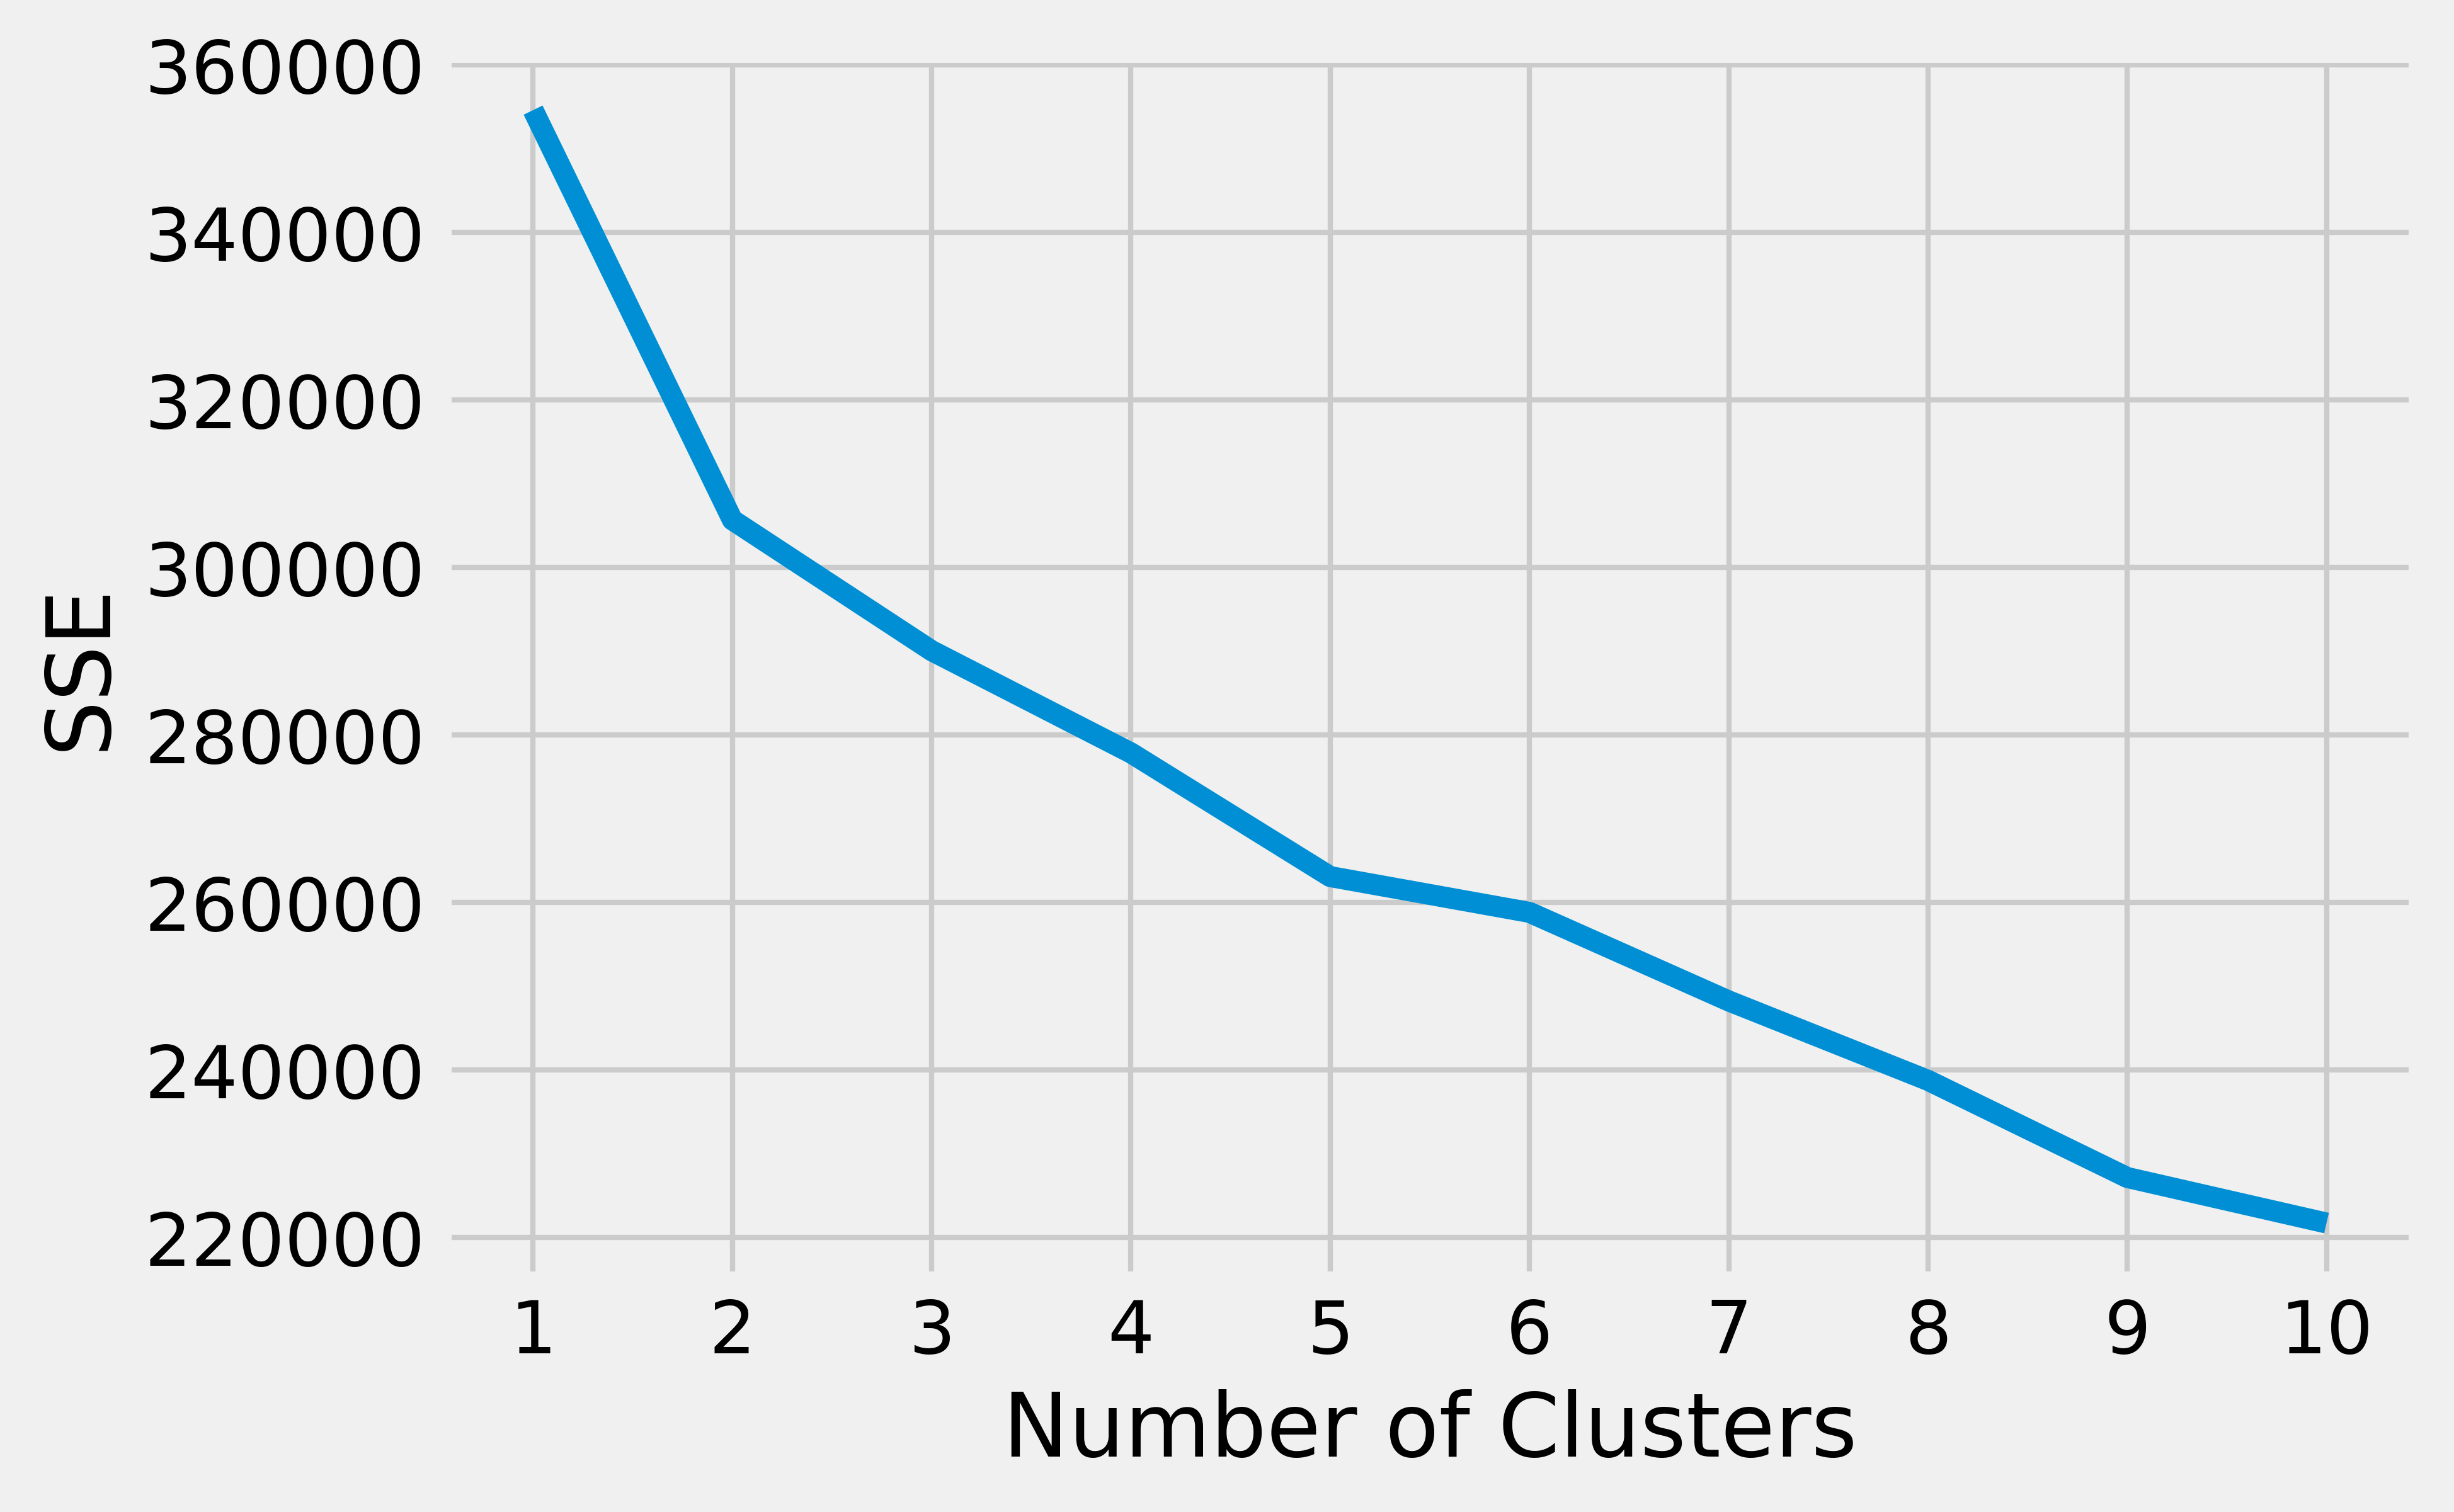

In [275]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [276]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow


5

In [277]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

KMeans(init='random', n_clusters=2, random_state=42)

KMeans(init='random', n_clusters=3, random_state=42)

KMeans(init='random', n_clusters=4, random_state=42)

KMeans(init='random', n_clusters=5, random_state=42)

KMeans(init='random', n_clusters=6, random_state=42)

KMeans(init='random', n_clusters=7, random_state=42)

KMeans(init='random', random_state=42)

KMeans(init='random', n_clusters=9, random_state=42)

KMeans(init='random', n_clusters=10, random_state=42)

([<matplotlib.axis.XTick at 0x2420a5f0100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Silhouette Coefficient')

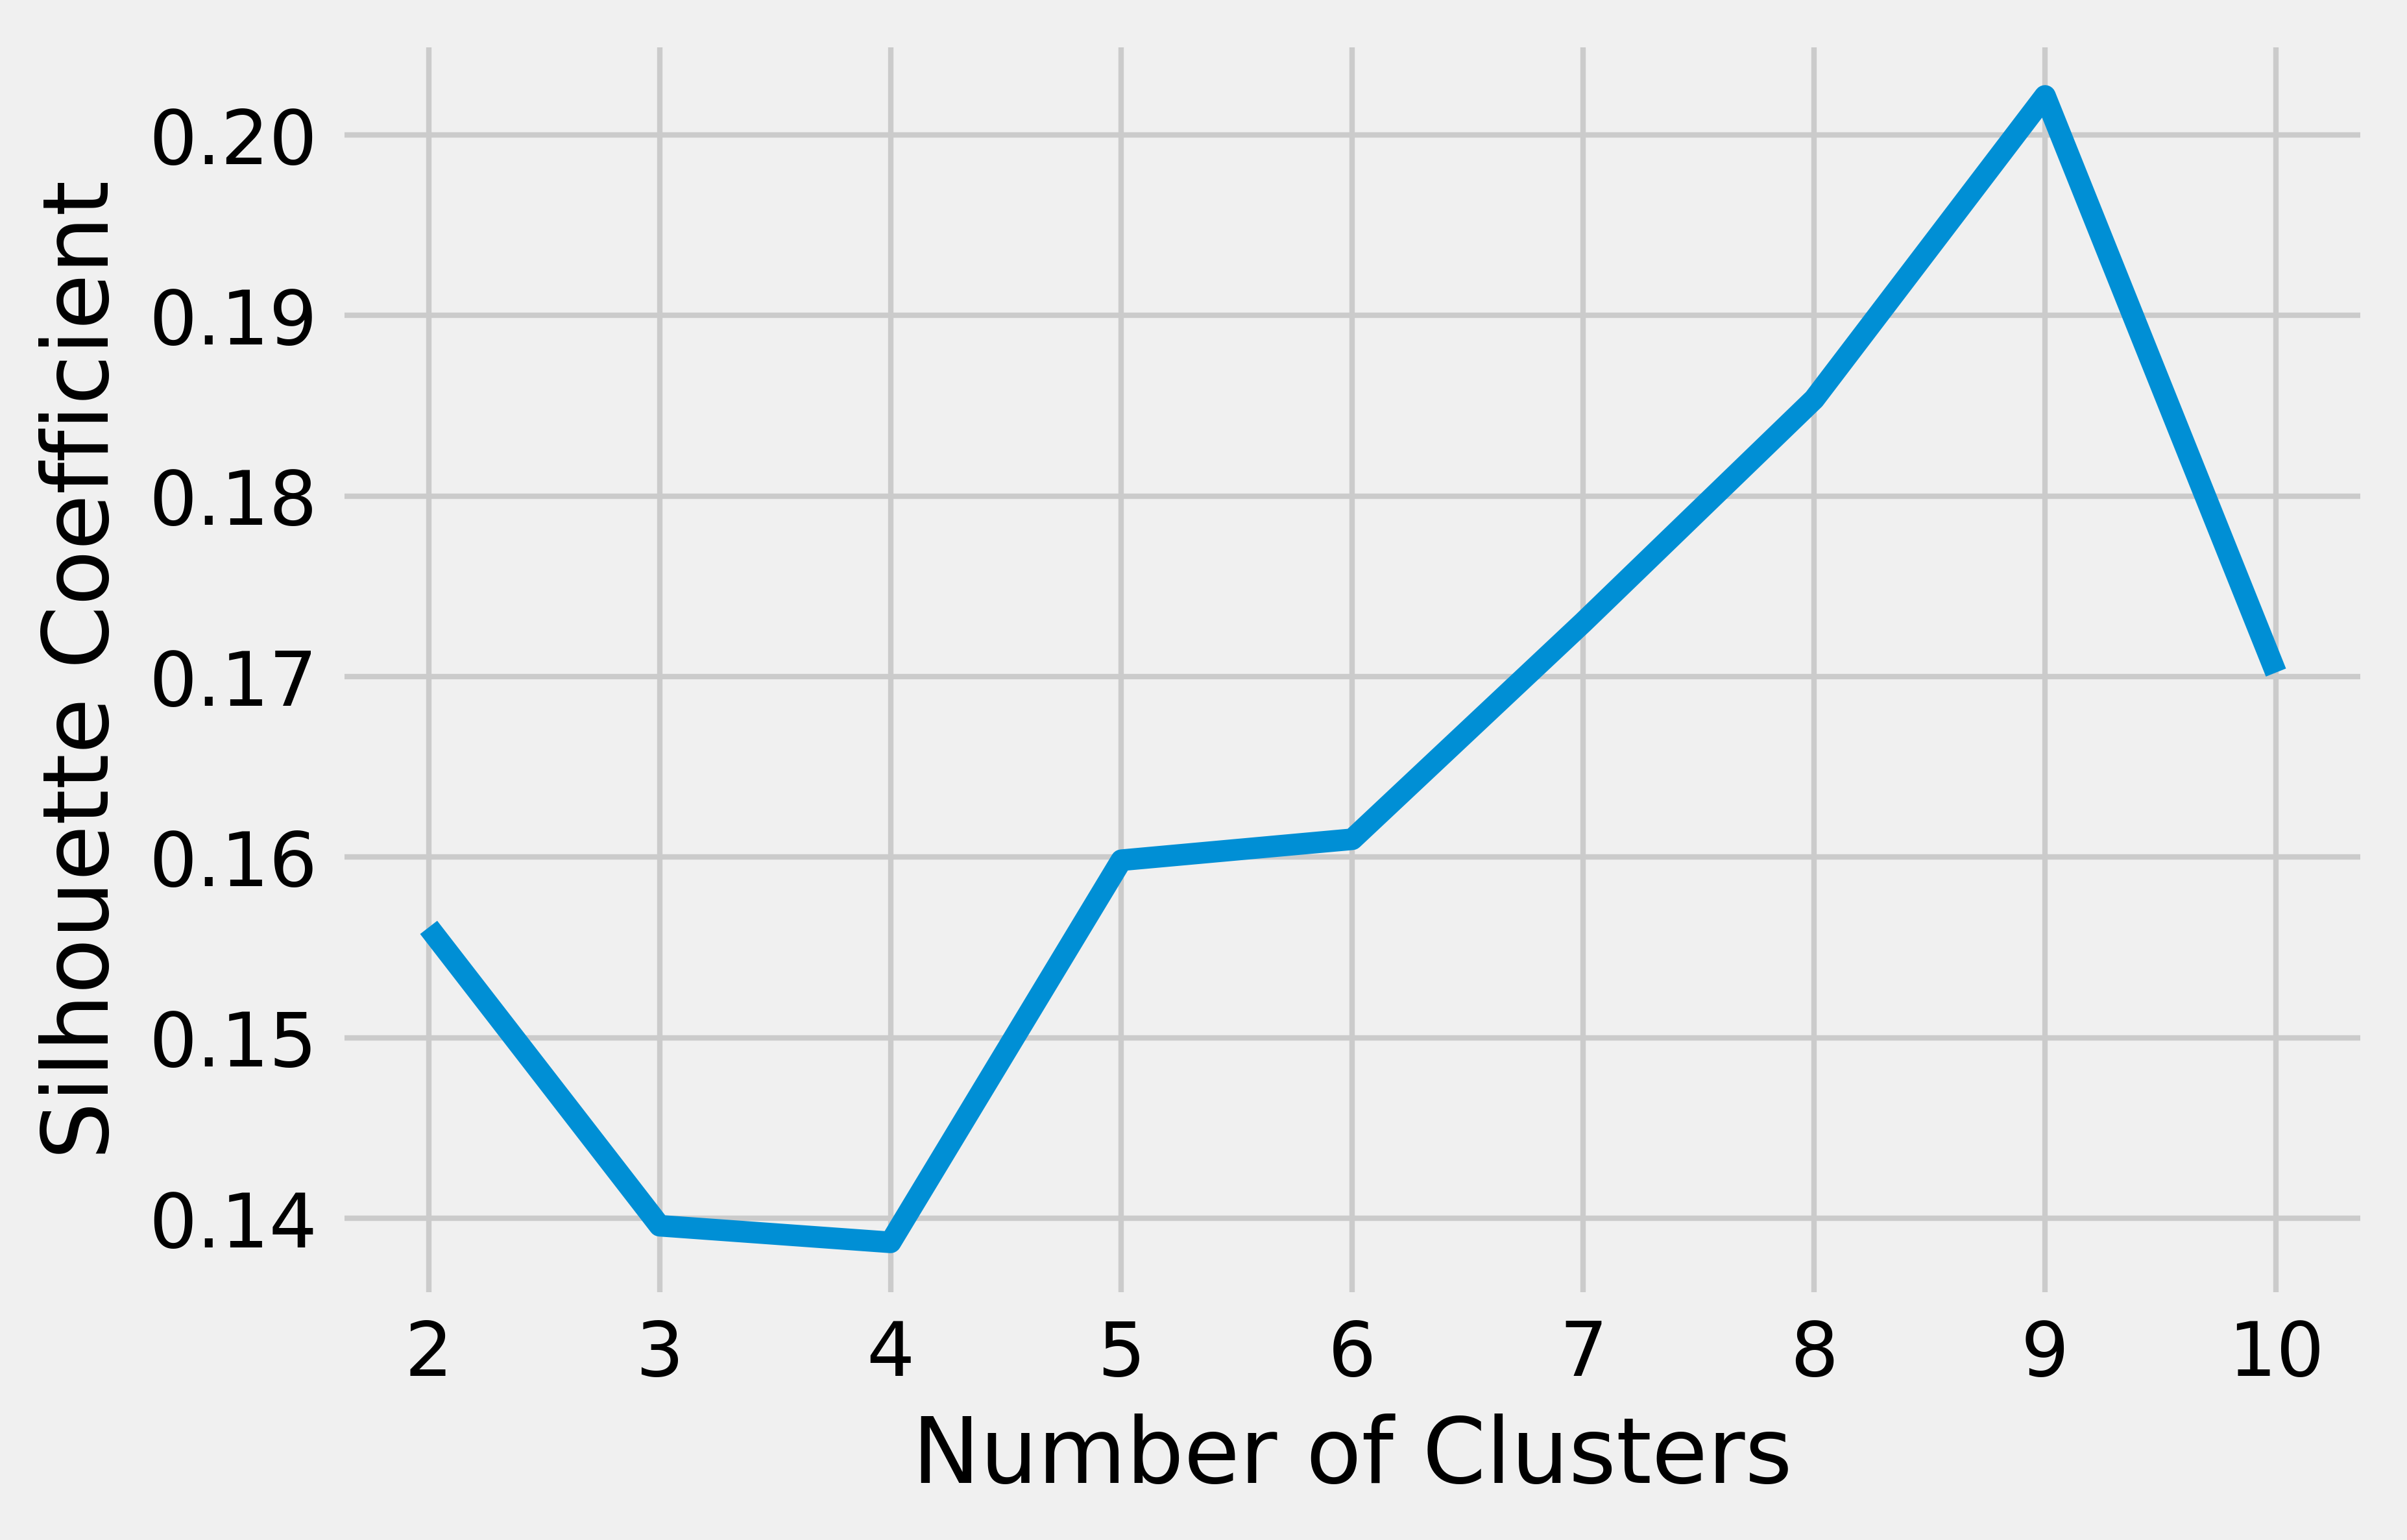

In [278]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [279]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [23]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(X)

In [282]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=5)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

KMeans(n_clusters=5)

DBSCAN(eps=0.3)

In [283]:
kmeans_silhouette

dbscan_silhouette

0.16

-0.18

Text(0.5, 0.98, 'Clustering Algorithm Comparison: Crescents')

Text(0.5, 1.0, 'k-means\nSilhouette: 0.16')

KeyError: -1

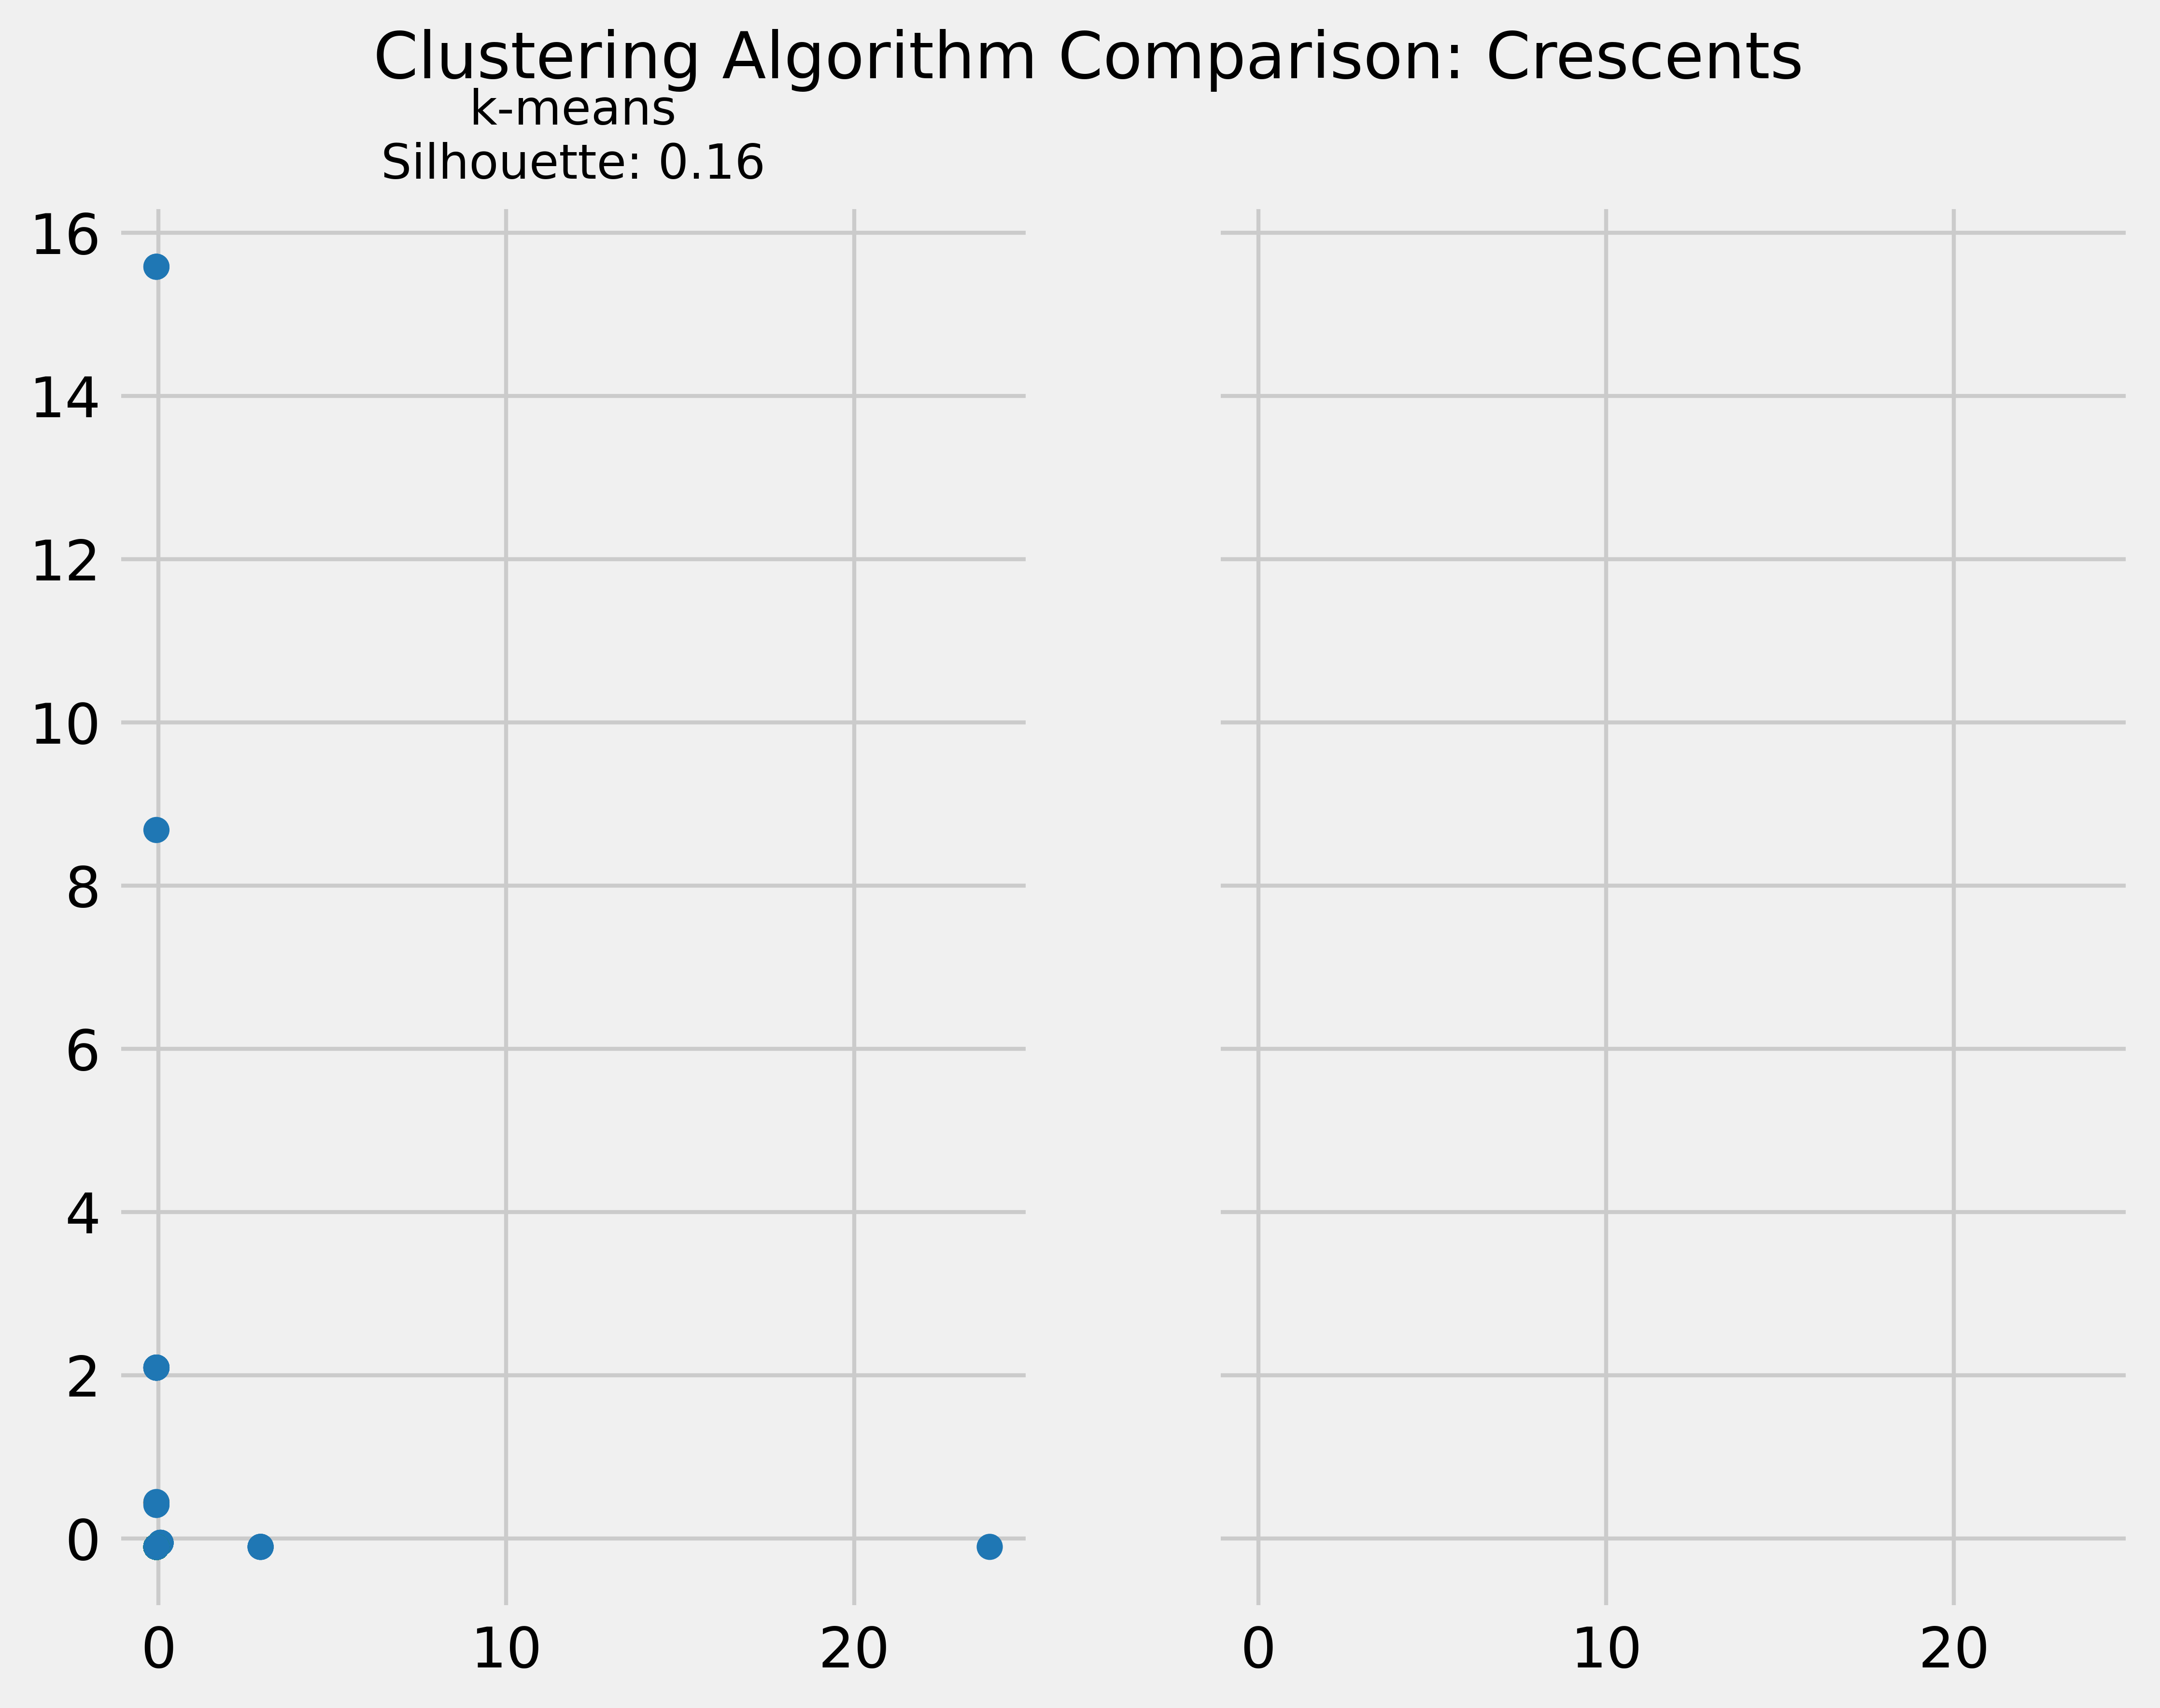

In [ ]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

In [27]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

round(ari_kmeans, 2)

round(ari_dbscan, 2)

0.47

1.0

# K-Means Clustering Pipeline

In [28]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [29]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# Build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

# Download the file
r = urllib.request.urlretrieve (full_download_url, archive_name)

# Extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

In [32]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"

data = np.genfromtxt(
    datafile,
    delimiter=",",
    usecols=range(1, 20532),
    skip_header=1
)

true_label_names = np.genfromtxt(
    labels_file,
    delimiter=",",
    usecols=(1,),
    skip_header=1,
    dtype="str"
)

In [31]:
data[:5, :3]

true_label_names[:5]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

In [38]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(true_label_names)

true_labels[:5]

array([4, 3, 4, 4, 0], dtype=int64)

In [39]:
label_encoder.classes_

n_clusters = len(label_encoder.classes_)

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [40]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

In [41]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [42]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [43]:
pipe.fit(data)


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [44]:
preprocessed_data = pipe["preprocessor"].transform(data)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450307

In [45]:
adjusted_rand_score(true_labels, predicted_labels)


0.722276752060253

In [46]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

ValueError: Shape of passed values is (801, 10), indices imply (801, 2)

# Tuning a K-Means Clustering Pipeline

In [47]:
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(data)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(data),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        true_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=3, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=4, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=5, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=6, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=7, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=8, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=9, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=10, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, 'n_components')

Text(0.5, 1.0, 'Clustering Performance as a Function of n_components')

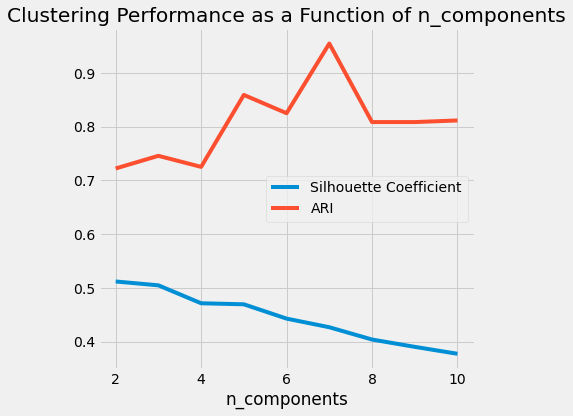

In [48]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()